# Ejemplo de Análisis de AM

### Paqueterías

In [2]:
#using Graphs

In [1]:
# Paquetes
using DelimitedFiles
using LightGraphs
using Plots, LaTeXStrings
pyplot()
#using StatsPlots
using GraphPlot
using Colors
using Compose
using StatsBase
using RandomNumbers.Xorshifts

In [226]:
using StatsPlots

### Diccionario vértices

In [2]:
am_dicc1 =  readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/diccionarios/dictionary_final.csv", ',')

3073×527 Array{Any,2}:
     ""  "global_airports"      "global_num"  …  "4K_num"  "4D_num"  "4B_num"
    1    "AER"                 1                 "NA"      "NA"      "NA"    
    2    "ASF"                 2                 "NA"      "NA"      "NA"    
    3    "CEK"                 3                 "NA"      "NA"      "NA"    
    4    "DME"                 4                 "NA"      "NA"      "NA"    
    5    "EGO"                 5              …  "NA"      "NA"      "NA"    
    6    "GYD"                 6                 "NA"      "NA"      "NA"    
    7    "KGD"                 7                 "NA"      "NA"      "NA"    
    8    "KZN"                 8                 "NA"      "NA"      "NA"    
    9    "LED"                 9                 "NA"      "NA"      "NA"    
   10    "MRV"                10              …  "NA"      "NA"      "NA"    
   11    "NBC"                11                 "NA"      "NA"      "NA"    
   12    "NJC"                12         

In [3]:
am_dicc1[1,:]

527-element Array{Any,1}:
 ""                 
 "global_airports"  
 "global_num"       
 "Star_Alliance_num"
 "Sky_Team_num"     
 "oneworld_num"     
 "AA_num"           
 "TK_num"           
 "DL_num"           
 "MU_num"           
 "CZ_num"           
 "UA_num"           
 "FR_num"           
 ⋮                  
 "H7_num"           
 "GY_num"           
 "EW_num"           
 "D6_num"           
 "7E_num"           
 "6Y_num"           
 "6I_num"           
 "5M_num"           
 "5G_num"           
 "4K_num"           
 "4D_num"           
 "4B_num"           

In [4]:
#am_dicc =  readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/diccionarios/dictionary_final.csv", ',')
am_dicc = hcat(am_dicc1[:,2],am_dicc1[:,3],am_dicc1[:,69])

3073×3 Array{Any,2}:
 "global_airports"      "global_num"  "AM_num"
 "AER"                 1              "NA"    
 "ASF"                 2              "NA"    
 "CEK"                 3              "NA"    
 "DME"                 4              "NA"    
 "EGO"                 5              "NA"    
 "GYD"                 6              "NA"    
 "KGD"                 7              "NA"    
 "KZN"                 8              "NA"    
 "LED"                 9              "NA"    
 "MRV"                10              "NA"    
 "NBC"                11              "NA"    
 "NJC"                12              "NA"    
 ⋮                                            
 "KZI"              3061              "NA"    
 "KOT"              3062              "NA"    
 "PSJ"              3063              "NA"    
 "LPS"              3064              "NA"    
 "ORX"              3065              "NA"    
 "BVS"              3066              "NA"    
 "MTE"              3067              "

In [5]:
findall(u -> u==67,am_dicc[:,3])

1-element Array{Int64,1}:
 1118

In [6]:
am_dicc[1118,:]

3-element Array{Any,1}:
     "VVI"
 1117     
   67     

### Información de la red AM

In [7]:
am_info =  readdlm("/Users/yuriko/Desktop/tabla_info_net3.csv", '\t')
am_info = hcat(am_info[1,:],am_info[68,:])

12×2 Array{Any,2}:
 "Airline"                           "AM"    
 "Nodes"                           67        
 "Links"                          161        
 "Density"                          0.0364089
 "In_Degree"                        2.40299  
 "Out_Degree"                       2.40299  
 "Av._Degree"                       2.40299  
 "Av._Betweenness"                  0.0484187
 "Av._Betweenness_no_endpoints"     0.0176495
 "Global_Clustering_Coefficient"    0.0074224
 "Coverage"                        37.8021   
 "Normalized_Coverage"              0.56421  

### Matriz de adyacencia

In [11]:
using CSV

┌ Info: Recompiling stale cache file /Users/yuriko/.julia/compiled/v1.1/CSV/HHBkp.ji for CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1184


In [12]:
df = CSV.read("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/AM_matriz_du.csv")

,Column1,ACA,BJX,BOG,BRU,CCS,CDG,CJS,CLQ,CME,CUL,CUN
,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,ACA,0,0,0,0,0,0,0,0,0,0,0
2,BJX,0,0,0,0,0,0,0,0,0,0,0
3,BOG,0,0,0,0,0,0,0,0,0,0,0
4,BRU,0,0,0,0,0,0,0,0,0,0,0
5,CCS,0,0,0,0,0,0,0,0,0,0,0
6,CDG,0,0,0,0,0,0,0,0,0,0,0
7,CJS,0,0,0,0,0,0,0,0,0,0,0
8,CLQ,0,0,0,0,0,0,0,0,0,0,0
9,CME,0,0,0,0,0,0,0,0,0,0,0


In [10]:
am_matriz_du = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/AM_matriz_du.csv", ',')

68×68 Array{Any,2}:
 ""      "ACA"   "BJX"   "BOG"   "BRU"  …   "VER"   "VSA"   "YUL"   "VVI"
 "ACA"  0       0       0       0          0       0       0       0     
 "BJX"  0       0       0       0          0       0       0       0     
 "BOG"  0       0       0       0          0       0       0       0     
 "BRU"  0       0       0       0          0       0       0       0     
 "CCS"  0       0       0       0       …  0       0       0       0     
 "CDG"  0       0       0       0          0       0       0       0     
 "CJS"  0       0       0       0          0       0       0       0     
 "CLQ"  0       0       0       0          0       0       0       0     
 "CME"  0       0       0       0          0       0       0       0     
 "CUL"  0       0       0       0       …  0       0       0       0     
 "CUN"  0       0       0       0          0       0       0       0     
 "CUU"  0       0       0       0          0       0       0       0     
 ⋮                

In [8]:
am_matriz = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/matriz/AM_import_matrix.csv", '\t', Int)

67×67 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0    

### Nombre aeropuertos

In [13]:
am_nombres = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/matriz/AM_airport_names.csv", '\t', String)

67×1 Array{String,2}:
 "ACA"
 "BJX"
 "BOG"
 "BRU"
 "CCS"
 "CDG"
 "CJS"
 "CLQ"
 "CME"
 "CUL"
 "CUN"
 "CUU"
 "CVM"
 ⋮    
 "SMF"
 "TAM"
 "TAP"
 "TGZ"
 "TIJ"
 "TPQ"
 "TRC"
 "UIO"
 "VER"
 "VSA"
 "YUL"
 "VVI"

In [14]:
#Aeropuerto Internacional Benito Juárez de la Ciudad de México en la Cd. de México, México
am_nombres[32,1]

"MEX"

In [15]:
#Aeropuerto Internacional General Abelardo L. Rodríguez en Tijuana, México
am_nombres[60,1]

"TIJ"

In [16]:
#Aeropuerto Internacional Jorge Chávez en la Cd. del Callao, Perú
am_nombres[27,1]

"LIM"

In [17]:
#Tiene grado de entrada 0
#Grado de salida 1
#Por lo que no se puede llegar a él, a excepción de que se empiece ahí
am_nombres[28,1]

"LPB"

In [18]:
#Tiene grado de entrada 1
#Grado de salida 0
#Por lo que es un end-point y una vez que se llega, no se puede salir.
am_nombres[67,1]

"VVI"

In [19]:
red_AM = DiGraph{Int64}(am_matriz)

{67, 161} directed simple Int64 graph

In [20]:
typeof(red_AM)

SimpleDiGraph{Int64}

### Número de vértices

In [23]:
#Número de vértices
v_AM = collect(1:nv(red_AM));

In [19]:
?degree

search: degree degree_histogram degree_centrality DegreeVertexCover



```
degree(g[, v])
```

Return a vector corresponding to the number of edges which start or end at each vertex in graph `g`. If `v` is specified, only return degrees for vertices in `v`. For directed graphs, this value equals the incoming plus outgoing edges. For undirected graphs, it equals the connected edges.

# Examples

```jldoctest
julia> using LightGraphs

julia> g = DiGraph(3);

julia> add_edge!(g, 2, 3);

julia> add_edge!(g, 3, 1);

julia> degree(g)
3-element Array{Int64,1}:
 1
 1
 2
```


### Gráfico Red

In [22]:
nodelabel_AM = collect(am_nombres)
outdegree_AM = outdegree(red_AM)
degree_AM = degree(red_AM)

67-element Array{Int64,1}:
  2
  6
  2
  2
  2
  2
  2
  2
  2
  4
 10
  2
  2
  ⋮
  2
  4
  2
  2
 11
  2
  2
  2
  6
  8
  2
  1

In [39]:
degree_AM[32]

105

In [40]:
outdegree_AM[32]

52

In [42]:
indegree(red_AM)

67-element Array{Int64,1}:
 1
 3
 1
 1
 1
 1
 1
 1
 1
 2
 5
 1
 1
 ⋮
 1
 2
 1
 1
 5
 1
 1
 1
 3
 4
 1
 1

In [43]:
ans[32]

53

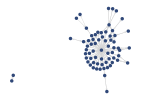

In [24]:
#red 
gplot(red_AM, arrowlengthfrac = 0.04, nodelabelsize = degree_AM, nodefillc = colorant"#304878")

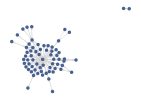

In [25]:
#red con nombres y tamaño de labels de acuerdo a su grado
gplot(red_AM, arrowlengthfrac = 0.04, nodelabelsize = degree_AM, nodefillc = colorant"#486090")

In [26]:
##red con transparencia de acuerdo a su grado
#alphas = degree_AM/maximum(degree_AM)
#nodefillc = [RGB(48,72,120,i) for i in alphas]
#gplot(red_AM, nodefillc = nodefillc, arrowlengthfrac = 0.04)

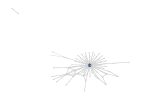

In [28]:
#red con número de vértice de acuerdo a su grado
am_32= gplot(red_AM, arrowlengthfrac = 0.03, nodelabel = v_AM, nodesize = degree_AM, nodelabelsize = degree_AM, NODELABELSIZE=2.5, nodefillc = colorant"#304878", nodelabelc=colorant"#f0f0f0")

In [103]:
draw(PDF("red1.pdf", 16cm, 16cm), gplot(am_32))

ErrorException: The Cairo and Fontconfig packages are necessary for saving as Compose.PDF.
Add them with the package manager if necessary, then run `import Cairo,
Fontconfig` before invoking `Compose.PDF`.


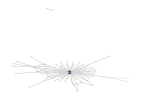

In [32]:
#red con nombres y tamaño de labels de acuerdo a su grado y nodo tamaño de acuerdo al grado
gplot(red_AM, arrowlengthfrac = 0.03, nodelabel = nodelabel_AM, nodesize = degree_AM, nodelabelsize = degree_AM, nodefillc = colorant"#304878", nodelabelc=colorant"#f0f0f0", NODELABELSIZE=1.6)

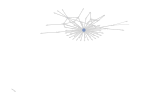

In [33]:
#red con nombres y tamaño de labels de acuerdo a su grado y nodo tamaño de acuerdo al grado
gplot(red_AM, arrowlengthfrac = 0.03, nodesize = degree_AM, nodelabelsize = degree_AM, nodefillc = colorant"#7c93bf", NODELABELSIZE=1)

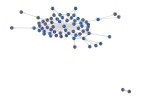

In [34]:
#red con número de vértices todo del mismo tamaño
gplot(red_AM, nodelabel = v_AM, arrowlengthfrac = 0.04, nodelabelsize = 0.01, nodefillc = colorant"#304878", nodelabelc=colorant"#c0c0d8", NODELABELSIZE=2.6)

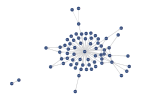

In [58]:
#red con nombres
gplot(red_AM, nodelabel = nodelabel_AM, arrowlengthfrac = 0.03, nodefillc = colorant"#304878", nodelabelc=colorant"#c0c0d8", NODELABELSIZE=1.4)

In [504]:
#red
alphas = maximum(outdegree_AM)/outdegree_AM
nodefillc = [RGBA(0.0,0.8,0.8,i) for i in alphas]
nodelabel_AM = collect(am_nombres)

gplot(red_AM, arrowlengthfrac = 0.04, nodefillc = nodefillc, nodelabel = nodelabel_AM) #nodesize=outdegree_AM, nodelabelsize=outdegree_AM

MethodError: MethodError: no method matching Array{Compose.FillPrimitive,1}(::Array{Compose.FillPrimitive,2})

You might have used a 2d row vector where a 1d column vector was required.
Note the difference between 1d column vector [1,2,3] and 2d row vector [1 2 3].
You can convert to a column vector with the vec() function.
Closest candidates are:
  Array{Compose.FillPrimitive,1}(::AbstractArray{S,N}) where {T, N, S} at array.jl:482
  Array{Compose.FillPrimitive,1}() where T at boot.jl:421
  Array{Compose.FillPrimitive,1}(!Matched::UndefInitializer, !Matched::Int64) where T at boot.jl:402
  ...

### Vecinos

In [36]:
function neighbours(M::Array{Int64,2})
    
    nodos = size(M, 1) #aeropuertos
    vecindades = []
    
    for i in 1:nodos
        vecinos = findall(x -> x != 0, M[i, :])
        push!(vecindades, vecinos)
    end
    vecindades
end

neighbours (generic function with 1 method)

In [37]:
tt=neighbours(am_matriz)

67-element Array{Any,1}:
 [32]                   
 [32, 53, 60]           
 [32]                   
 [30]                   
 [32]                   
 [32]                   
 [32]                   
 [32]                   
 [32]                   
 [32, 60]               
 [18, 23, 25, 30, 32]   
 [32]                   
 [32]                   
 ⋮                      
 [16]                   
 [36, 64]               
 [32]                   
 [32]                   
 [2, 10, 16, 32, 39, 48]
 [32]                   
 [32]                   
 [32]                   
 [32, 57, 65]           
 [32, 34, 43, 64]       
 [32]                   
 Int64[]                

In [38]:
tt[32]

52-element Array{Int64,1}:
  1
  2
  3
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14
  ⋮
 53
 54
 55
 58
 59
 60
 61
 62
 63
 64
 65
 66

In [59]:
am_vecinos = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/matriz/AM_neighbours.csv", '\t')

66×52 Array{Any,2}:
 32    ""    ""    ""    ""    ""  ""  …  ""  ""  ""  ""  ""  ""  ""  ""  ""
 32  53    60      ""    ""    ""  ""     ""  ""  ""  ""  ""  ""  ""  ""  ""
 32    ""    ""    ""    ""    ""  ""     ""  ""  ""  ""  ""  ""  ""  ""  ""
 30    ""    ""    ""    ""    ""  ""     ""  ""  ""  ""  ""  ""  ""  ""  ""
 32    ""    ""    ""    ""    ""  ""     ""  ""  ""  ""  ""  ""  ""  ""  ""
 32    ""    ""    ""    ""    ""  ""  …  ""  ""  ""  ""  ""  ""  ""  ""  ""
 32    ""    ""    ""    ""    ""  ""     ""  ""  ""  ""  ""  ""  ""  ""  ""
 32    ""    ""    ""    ""    ""  ""     ""  ""  ""  ""  ""  ""  ""  ""  ""
 32    ""    ""    ""    ""    ""  ""     ""  ""  ""  ""  ""  ""  ""  ""  ""
 32  60      ""    ""    ""    ""  ""     ""  ""  ""  ""  ""  ""  ""  ""  ""
 18  23    25    30    32      ""  ""  …  ""  ""  ""  ""  ""  ""  ""  ""  ""
 32    ""    ""    ""    ""    ""  ""     ""  ""  ""  ""  ""  ""  ""  ""  ""
 32    ""    ""    ""    ""    ""  ""     ""  ""  ""  ""

### Grados

In [60]:
"""

    n_out_degree(M::Array{Int64,2}, n::Int64)

Función que obtiene el grado de entrada de un cierto nodo n de la red representada por la matriz de adyacencia M.

Parámetros:
M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}
n nodo a evaluar de tipo Int64

Resultado:
Grado de entrada del nodo n representado por un valor numérico de tipo Int64

Implementación

#### Ejemplos
"""
function n_out_degree(M::Array{Int64,2}, n::Int64)
    grado_entrada = sum(M[n, :])
end

n_out_degree

In [61]:
"""
    out_degree(M::Array{Int64,2})

Función que obtiene el grado de entrada de una red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}

Resultado:
Devuelve un arreglo de tipo Array{Int64,2} que contiene los grados de entrada de todos los nodos n de la red.

## Implementación

### Ejemplos
"""
function out_degree(M::Array{Int64,2})
    grados_entrada = sum(M, dims = 2)
end

out_degree

In [62]:
"""
Función de distribución de grado de entrada
"""
function distrib_out_degree(M::Array{Int64,2})
    x = out_degree(M)
    degree_count = counts(x)
    return degree_count
end

distrib_out_degree

In [63]:
am_dist_outgrado = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/grados/AM_distrib_in_degree.csv", ',', Int64)

53×1 Array{Int64,2}:
  1
 43
 12
  5
  2
  1
  1
  0
  1
  0
  0
  0
  0
  ⋮
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  1

In [64]:
am_outgrado = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/grados/AM_in_degree.csv", ',', Int64)

67×1 Array{Int64,2}:
 1
 3
 1
 1
 1
 1
 1
 1
 1
 2
 5
 1
 1
 ⋮
 1
 2
 1
 1
 6
 1
 1
 1
 3
 4
 1
 0

In [65]:
outdegree(red_AM)

67-element Array{Int64,1}:
 1
 3
 1
 1
 1
 1
 1
 1
 1
 2
 5
 1
 1
 ⋮
 1
 2
 1
 1
 6
 1
 1
 1
 3
 4
 1
 0

In [66]:
"""
    n_in_degree(M::Array{Int64,2}, n::Int64)

Función que obtiene el grado de salida de un cierto nodo n de la red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}
* n nodo a evaluar de tipo Int64

Resultado:
Grado de salida del nodo n representado por un valor numérico de tipo Int64

## Implementación

### Ejemplos
"""

function n_in_degree(M::Array{Int64,2}, n::Int64)
    grado_salida = sum(M[:, n])
end

n_in_degree (generic function with 1 method)

In [67]:
"""
    in_degree(M::Array{Int64,2})

Función que obtiene el grado de salida de una red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}

Resultado:
Devuelve un arreglo de tipo Array{Int64,2} que contiene los grados de salida de todos los nodos n de la red.

## Implementación

### Ejemplos
"""
function in_degree(M::Array{Int64,2})
    grados_salida = sum(M, dims = 1)
end

in_degree

In [68]:
in_degree(am_matriz)

1×67 Array{Int64,2}:
 1  3  1  1  1  1  1  1  1  2  5  1  1  …  1  2  1  1  5  1  1  1  3  4  1  1

In [69]:
"""
Función de distribución de grado de salida
"""
function distrib_in_degree(M::Array)
    x = in_degree(M)
    degree_count = counts(x)
    return degree_count
end

distrib_in_degree

In [70]:
am_dist_ingrado = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/grados/AM_distrib_out_degree.csv", ',', Int64)

54×1 Array{Int64,2}:
  1
 44
 11
  4
  3
  2
  0
  0
  1
  0
  0
  0
  0
  ⋮
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  1

In [71]:
am_ingrado = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/grados/AM_out_degree.csv", '\t', Int64)

1×67 Array{Int64,2}:
 1  3  1  1  1  1  1  1  1  2  5  1  1  …  1  2  1  1  5  1  1  1  3  4  1  1

In [72]:
indegree(red_AM)

67-element Array{Int64,1}:
 1
 3
 1
 1
 1
 1
 1
 1
 1
 2
 5
 1
 1
 ⋮
 1
 2
 1
 1
 5
 1
 1
 1
 3
 4
 1
 1

In [73]:
#Endpoints
am_vecinos[67]

""

In [207]:
"""
    plot_distrib(M::Array{Int64,2}, tipo::String, titulo::String, color::String)

Función con parámetros:
M = matriz
tipo = "in" o "out"
titulo = acepta el título del gráfico
color = color de las barras

que regresa un histograma de la distribución de grado, entrada o salida.
"""
function plot_distrib(M::Array{Int64,2}, tipo::String, titulo::String, color::String)

    if tipo == "out"
        distribucion = am_dist_outgrado #distrib_in_degree(M::Array)
        tipo = "salida"
    elseif tipo == "in"
        distribucion = am_dist_ingrado #distrib_out_degree(M::Array)
        tipo = "entrada"
    end
    distribucion

    graph = bar(distribucion, fillcolor = color, markersize = 3, linealpha = 0.5,
    title = titulo,
    legend = false,
    xlabel = "Grado de $tipo",
    ylabel = "Frecuencia",
    xlims = (-1,60), #obtener límites
    ylims = (-1,50)) #obtener límites
end

plot_distrib

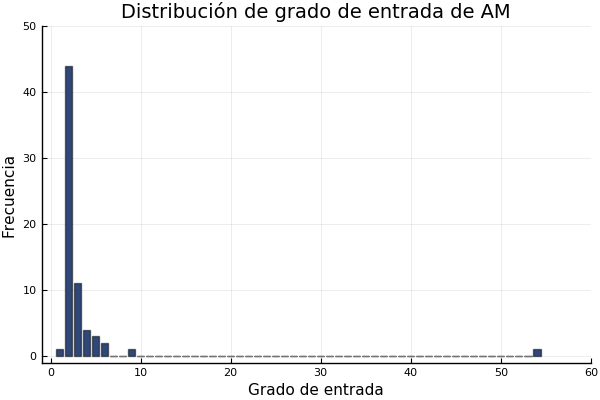

In [208]:
AM_indeg = plot_distrib(am_matriz, "in", "Distribución de grado de entrada de AM", "#304878")

In [210]:
savefig(AM_indeg, "/Users/yuriko/Documents/UNAM/Tesis_Lic/Images/AM_in_deg.pdf")

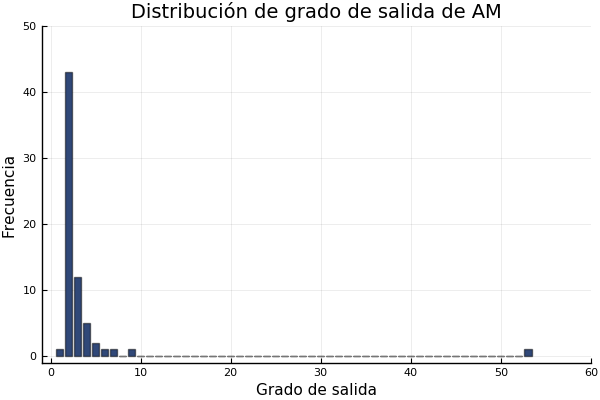

In [209]:
AM_outdeg = plot_distrib(am_matriz, "out", "Distribución de grado de salida de AM", "#304878")

In [211]:
savefig(AM_outdeg, "/Users/yuriko/Documents/UNAM/Tesis_Lic/Images/AM_out_deg.pdf")

In [332]:
degree(red_AM)

67-element Array{Int64,1}:
  2
  6
  2
  2
  2
  2
  2
  2
  2
  4
 10
  2
  2
  ⋮
  2
  4
  2
  2
 11
  2
  2
  2
  6
  8
  2
  1

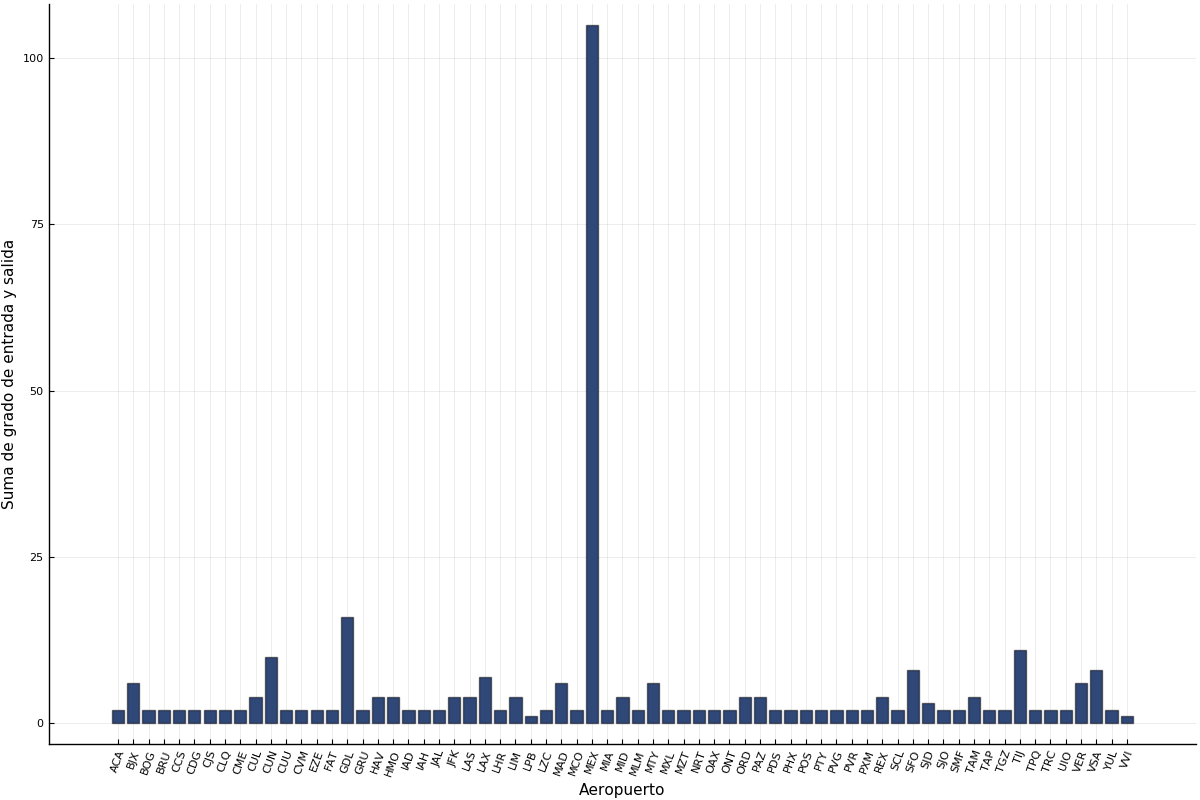

In [350]:
xs = [am_nombres]
ys = [degree(red_AM)]
graph = bar(xs, ys, fillcolor = "#304878", markersize = 3, linealpha = 0.5,
    #title = "Grado",
    legend = false,
    gridalpha = 0.1,
    xlabel = "Aeropuerto",
    ylabel = "Suma de grado de entrada y salida",
    xticks = :all,
    xtickfont = (4.1),
    size = (1200, 800),
    xrotation = 70)

In [351]:
savefig(graph, "/Users/yuriko/Documents/UNAM/Tesis_Lic/Images/AM_sum_deg.pdf")

### Betweenness

In [77]:
"""
    my_betweenness_centrality(M::Array{Int64,2}, airline_code::String)

Función que hace el grafo de la red aérea dirigida.
"""
function my_betweenness_centrality(M::Array{Int64,2}, airline_code::String)

    grafo = DiGraph(M)
    res = betweenness_centrality(grafo)

    return res

end

my_betweenness_centrality

In [78]:
between = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/betweenness/AM_betweenness_centrality.csv", ',', Float64)

67×1 Array{Float64,2}:
 0.0                  
 0.0007770007770007769
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.002097902097902098 
 0.0                  
 0.0                  
 ⋮                    
 0.0                  
 0.0002331002331002331
 0.0                  
 0.0                  
 0.044910644910644906 
 0.0                  
 0.0                  
 0.0                  
 0.014529914529914529 
 0.015306915306915305 
 0.0                  
 0.0                  

In [354]:
betweenness_centrality(red_AM)

67-element Array{Float64,1}:
 0.0                  
 0.0007770007770007769
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.0                  
 0.002097902097902098 
 0.0                  
 0.0                  
 ⋮                    
 0.0                  
 0.0002331002331002331
 0.0                  
 0.0                  
 0.044910644910644906 
 0.0                  
 0.0                  
 0.0                  
 0.014529914529914529 
 0.015306915306915305 
 0.0                  
 0.0                  

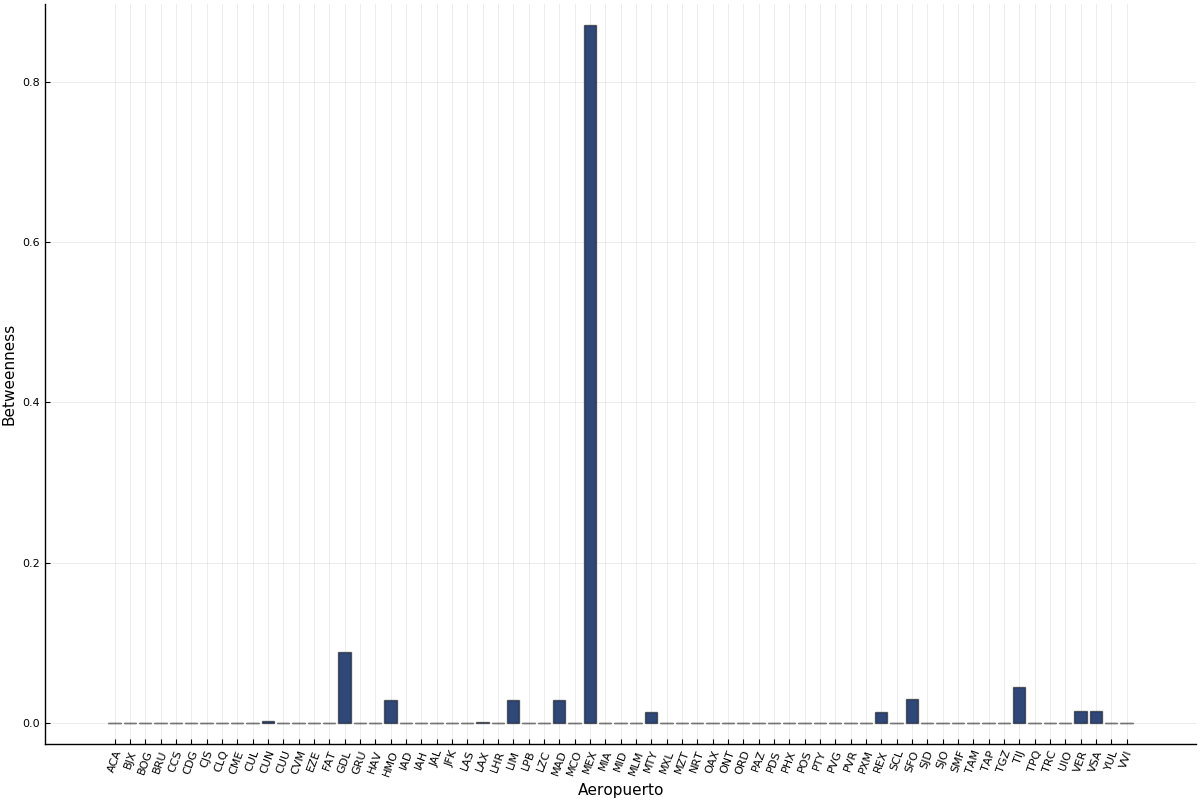

In [356]:
xss = [am_nombres]
yss = [betweenness_centrality(red_AM)]
graphs = bar(xss, yss, fillcolor = "#304878", markersize = 3, linealpha = 0.5,
    #title = "Grado",
    legend = false,
    gridalpha = 0.1,
    xlabel = "Aeropuerto",
    ylabel = "Betweenness",
    xticks = :all,
    xtickfont = (4.1),
    size = (1200, 800),
    xrotation = 70)

In [357]:
savefig(graphs, "/Users/yuriko/Documents/UNAM/Tesis_Lic/Images/AM_betw.pdf")

### Random Walks

In [79]:
function r_walks(M::Array{Int64,2}, f::Int64, steps::Int64, iter::Int64)
    
    paths = zeros(Int64, (iter, steps + 1))
    s = f
    seed = 1
    vecindades = neighbours(M)

    for i in 1:iter
        paths[i, 1] = f
        
        for p in 1:steps 
            vecindad = vecindades[s]
            
            if vecindad == []
                break
            else
                a = sample(Xoroshiro128Plus(seed), vecindad) 
                paths[i, p + 1] = a
                s = a
                seed += 1
            end
            
        end
        s = f
        
    end
    
    return paths 
end

r_walks (generic function with 1 method)

In [80]:
function random_walk(M::Array{Int64,2}, steps::Int64, iter::Int64) 
    
    random_walks = []
    nodos = size(M, 1)
    
    for f in 1:nodos #aeropuertos
        paths = r_walks(M, f, steps, iter)
        push!(random_walks, paths)
    end
    
    random_walks
end

random_walk (generic function with 1 method)

In [81]:
am_caminatas = random_walk(am_matriz, 2500, 100) 

67-element Array{Any,1}:
 [1 32 … 0 0; 1 32 … 0 0; … ; 1 32 … 0 0; 1 32 … 0 0]    
 [2 60 … 0 0; 2 53 … 0 0; … ; 2 60 … 0 0; 2 53 … 0 0]    
 [3 32 … 0 0; 3 32 … 0 0; … ; 3 32 … 0 0; 3 32 … 0 0]    
 [4 30 … 0 0; 4 30 … 0 0; … ; 4 30 … 0 0; 4 30 … 0 0]    
 [5 32 … 0 0; 5 32 … 0 0; … ; 5 32 … 0 0; 5 32 … 0 0]    
 [6 32 … 0 0; 6 32 … 0 0; … ; 6 32 … 0 0; 6 32 … 0 0]    
 [7 32 … 0 0; 7 32 … 0 0; … ; 7 32 … 0 0; 7 32 … 0 0]    
 [8 32 … 0 0; 8 32 … 0 0; … ; 8 32 … 0 0; 8 32 … 0 0]    
 [9 32 … 0 0; 9 32 … 0 0; … ; 9 32 … 0 0; 9 32 … 0 0]    
 [10 60 … 0 0; 10 32 … 0 0; … ; 10 32 … 0 0; 10 32 … 0 0]
 [11 23 … 0 0; 11 18 … 0 0; … ; 11 23 … 0 0; 11 23 … 0 0]
 [12 32 … 0 0; 12 32 … 0 0; … ; 12 32 … 0 0; 12 32 … 0 0]
 [13 32 … 0 0; 13 32 … 0 0; … ; 13 32 … 0 0; 13 32 … 0 0]
 ⋮                                                       
 [56 16 … 0 0; 56 16 … 0 0; … ; 56 16 … 0 0; 56 16 … 0 0]
 [57 64 … 0 0; 57 36 … 0 0; … ; 57 36 … 0 0; 57 36 … 0 0]
 [58 32 … 0 0; 58 32 … 0 0; … ; 58 32 … 0 0; 58

In [82]:
am_caminatas[32];

In [27]:
#Archivo de caminatas con nodo inicial en MEX-32
#100x2501 100 iteraciones y 2501 porque los pasos son 2500 más el nodo inicial
AM_32_rw = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/caminatas/originales/AM_32_random_walk.csv", '\t', Int64)

100×2501 Array{Int64,2}:
 32  29  32  26  32  24  32  22  32  …  0  0  0  0  0  0  0  0  0  0  0  0
 32  17  32  24  32  13  32  20  32     0  0  0  0  0  0  0  0  0  0  0  0
 32  17  32  20  32   9  32  64  32     0  0  0  0  0  0  0  0  0  0  0  0
 32  66  32  54  25  32  19  45  19     0  0  0  0  0  0  0  0  0  0  0  0
 32  17  32   7  32  62  32  50  32     0  0  0  0  0  0  0  0  0  0  0  0
 32   9  32   7  32  52  32  50  32  …  0  0  0  0  0  0  0  0  0  0  0  0
 32  25  11  30  11  18  32  20  32     0  0  0  0  0  0  0  0  0  0  0  0
 32  25  16  53  32  44  32  20  32     0  0  0  0  0  0  0  0  0  0  0  0
 32  17  32  53  32  58  32  40  32     0  0  0  0  0  0  0  0  0  0  0  0
 32  25  16  42  32   3  32  54  25     0  0  0  0  0  0  0  0  0  0  0  0
 32  36  24  32  30  11  25  11  25  …  0  0  0  0  0  0  0  0  0  0  0  0
 32  17  32   6  32  62  32  50  32     0  0  0  0  0  0  0  0  0  0  0  0
 32  17  32   7  32  62  32  50  32     0  0  0  0  0  0  0  0  0  0  0  0


In [28]:
#Archivo de caminatas con nodo inicial en LIM-27
#100x2501 100 iteraciones y 2501 porque los pasos son 2500 más el nodo inicial
AM_27_rw = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/caminatas/originales/AM_27_random_walk.csv", '\t', Int64)

100×2501 Array{Int64,2}:
 27  67   0   0   0   0   0   0   0  …  0  0  0  0  0  0  0  0  0  0  0  0
 27  32  26  32  24  32  22  32  21     0  0  0  0  0  0  0  0  0  0  0  0
 27  32  44  32  55  32  38  32  51     0  0  0  0  0  0  0  0  0  0  0  0
 27  32  63  32  51  43  51  43  51     0  0  0  0  0  0  0  0  0  0  0  0
 27  67   0   0   0   0   0   0   0     0  0  0  0  0  0  0  0  0  0  0  0
 27  32  54  25  32  19  45  19  32  …  0  0  0  0  0  0  0  0  0  0  0  0
 27  32  52  32  36  57  36  32  12     0  0  0  0  0  0  0  0  0  0  0  0
 27  67   0   0   0   0   0   0   0     0  0  0  0  0  0  0  0  0  0  0  0
 27  32   7  32  52  32  50  32  33     0  0  0  0  0  0  0  0  0  0  0  0
 27  32  58  32  54  25  32  20  32     0  0  0  0  0  0  0  0  0  0  0  0
 27  32  58  32   8  32   6  32  51  …  0  0  0  0  0  0  0  0  0  0  0  0
 27  32  37  32  21  32  10  60  39     0  0  0  0  0  0  0  0  0  0  0  0
 27  32  66  32  64  65  32  54  25     0  0  0  0  0  0  0  0  0  0  0  0


### Visitas

In [83]:
"""
    visited_vertices(W::Array{Any,1})

La función caminos tiene como parámetro W que es un arreglo de arreglos.
Regresa los nodos diferentes a los que llega el caminante.
"""
function visited_vertices(W::Array{Any,1})

    cobert = []
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos, no necesario
    #visit = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    visit = []

    for i in 1:v
        for j in 1:s
            u = unique(W[i][j, :])
            pop!(u)
            push!(visit, u)
            
        end
        
        push!(cobert, visit)
        visit = []
    end

    return cobert
end

visited_vertices

In [84]:
#Aeropuertos diferentes visitados en cada iteración que empieza en 32-MEX
ee=visited_vertices(am_caminatas)
ee[32]

100-element Array{Any,1}:
 [32, 29, 26, 24, 22, 21, 19, 45, 62, 60  …  41, 53, 18, 63, 59, 66, 54, 33, 27, 67]
 [32, 17, 24, 13, 20, 9, 65, 64, 34, 18  …  6, 61, 49, 30, 57, 22, 19, 45, 27, 67]  
 [32, 17, 20, 9, 64, 52, 12, 1, 55, 38  …  8, 63, 23, 19, 45, 29, 18, 33, 27, 67]   
 [32, 66, 54, 25, 19, 45, 40, 37, 16, 56  …  60, 15, 58, 26, 18, 11, 23, 42, 27, 67]
 [32, 17, 7, 62, 50, 31, 6, 61, 49, 20  …  40, 36, 51, 43, 5, 26, 52, 4, 27, 67]    
 [32, 9, 7, 52, 50, 33, 30, 10, 60, 16  …  58, 11, 23, 3, 1, 66, 48, 55, 27, 67]    
 [32, 25, 11, 30, 18, 20, 19, 16, 53, 35  …  26, 31, 55, 56, 15, 41, 64, 50, 27, 67]
 [32, 25, 16, 53, 44, 20, 18, 11, 14, 61  …  64, 57, 17, 6, 49, 65, 37, 55, 27, 67] 
 [32, 17, 53, 58, 40, 26, 16, 41, 13, 2  …  15, 37, 64, 20, 14, 12, 59, 31, 27, 67] 
 [32, 25, 16, 42, 3, 54, 11, 18, 27, 67]                                            
 [32, 36, 24, 30, 11, 25, 23, 22, 17, 7  …  56, 15, 54, 58, 40, 13, 8, 50, 27, 67]  
 [32, 17, 6, 62, 50, 31, 20, 59, 42, 27

In [85]:
#Archivo de visitas con nodo inicial en MEX-32
#Regresa los nodos diferentes a los que llega el caminante.
AM_32_visitados = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/visitas/AM_32_visited_vertices.csv", '\t')

100×65 Array{Any,2}:
 32  29  26  24  22  21  19  45  62  60  …    ""    ""    ""   ""  ""  ""  ""
 32  17  24  13  20   9  65  64  34  18       ""    ""    ""   ""  ""  ""  ""
 32  17  20   9  64  52  12   1  55  38       ""    ""    ""   ""  ""  ""  ""
 32  66  54  25  19  45  40  37  16  56       ""    ""    ""   ""  ""  ""  ""
 32  17   7  62  50  31   6  61  49  20      4    27    67    0    ""  ""  ""
 32   9   7  52  50  33  30  10  60  16  …    ""    ""    ""   ""  ""  ""  ""
 32  25  11  30  18  20  19  16  53  35       ""    ""    ""   ""  ""  ""  ""
 32  25  16  53  44  20  18  11  14  61       ""    ""    ""   ""  ""  ""  ""
 32  17  53  58  40  26  16  41  13   2       ""    ""    ""   ""  ""  ""  ""
 32  25  16  42   3  54  11  18  27  67       ""    ""    ""   ""  ""  ""  ""
 32  36  24  30  11  25  23  22  17   7  …  50    27    67    0    ""  ""  ""
 32  17   6  62  50  31  20  59  42  27       ""    ""    ""   ""  ""  ""  ""
 32  17   7  62  50  31   3  59  42  27    

In [86]:
#Archivo de caminatas con nodo inicial en LIM-27
AM_27_visitados = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/visitas/AM_27_visited_vertices.csv", '\t')

100×65 Array{Any,2}:
 27  67   0    ""    ""    ""    ""  …    ""    ""    ""    ""    ""   ""
 27  32  26  24    22    21    19         ""    ""    ""    ""    ""   ""
 27  32  44  55    38    51    43         ""    ""    ""    ""    ""   ""
 27  32  63  51    43    65    24         ""    ""    ""    ""    ""   ""
 27  67   0    ""    ""    ""    ""       ""    ""    ""    ""    ""   ""
 27  32  54  25    19    45    40    …    ""    ""    ""    ""    ""   ""
 27  32  52  36    57    12     1       67     0      ""    ""    ""   ""
 27  67   0    ""    ""    ""    ""       ""    ""    ""    ""    ""   ""
 27  32   7  52    50    33    30         ""    ""    ""    ""    ""   ""
 27  32  58  54    25    20    18         ""    ""    ""    ""    ""   ""
 27  32  58   8     6    51    43    …    ""    ""    ""    ""    ""   ""
 27  32  37  21    10    60    39         ""    ""    ""    ""    ""   ""
 27  32  66  64    65    54    25         ""    ""    ""    ""    ""   ""
  ⋮              

In [87]:
AM_32_visitados[1,1:44] #65

44-element Array{Any,1}:
 32
 29
 26
 24
 22
 21
 19
 45
 62
 60
 16
  2
 48
  ⋮
 25
 41
 53
 18
 63
 59
 66
 54
 33
 27
 67
  0

In [88]:
ee[32][1]

43-element Array{Int64,1}:
 32
 29
 26
 24
 22
 21
 19
 45
 62
 60
 16
  2
 48
  ⋮
 11
 25
 41
 53
 18
 63
 59
 66
 54
 33
 27
 67

#### Para tooodo, no muy bueno

In [89]:
"""
    freq_vertices_visits(W::Array{Any,1})

Función que hace un diccionario con frecuencias de visitas
"""
function freq_vertices_visits(W::Array{Any,1})

    dicc = [] #arreglo vacío

    nodos = length(W) #tamaño de caminatas
    iter = size(W[1], 1) #núm de iteraciones
    diccionario = 0

    for i in 1:nodos #corro por todos los nodos
        for j in 1:iter #corro por las iteraciones
            diccionario = countmap(W[i][j, :]) #hago diccionario de freqs de cada caminata
            push!(dicc, diccionario) #guardo el diccionario en un arreglo vacío
        end

        diccionario = 0
    end

    return dicc
end

freq_vertices_visits

In [90]:
fvv_am = freq_vertices_visits(am_caminatas)
fvv_am[32]

Dict{Int64,Int64} with 13 entries:
  32 => 9
  0  => 2479
  60 => 1
  17 => 1
  64 => 2
  65 => 1
  44 => 1
  61 => 1
  38 => 1
  13 => 1
  67 => 1
  27 => 1
  1  => 2

In [91]:
"""
    distrib_vertices_visits(W::Array{Any,1})

Función que crea un arreglo de arreglos con la distribución de frecuencia de visitas
"""
function distrib_vertices_visits(W::Array{Any,1})

    x = freq_vertices_visits(W) #diccionario de frecuencias
    l = length(W)
    f = 0
    frec_total = Array[] #zeros(Array, length(x)) #arreglo de ceros de tamaño núm dicc
    frec_nodo = zeros(Int64, l+1) #arreglo de nodos de tamaño núm nodos para get frec

    for i in 1:length(x) #corro por los nodos

        for j in 1:l+1 #corro por los nodos

            frec_nodo[j] = get(x[i], f, 0) #entrada j de freq nodo la cambio por la entrada j del dicc i
            f += 1
        end
        push!(frec_total, frec_nodo)

        f = 0
        frec_nodo = zeros(Int64, l+1)

    end

    return frec_total
end

distrib_vertices_visits

In [92]:
dvv_am = distrib_vertices_visits(am_caminatas)
dvv_am[32]

68-element Array{Int64,1}:
 2479
    2
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    ⋮
    0
    0
    0
    0
    1
    1
    0
    0
    2
    1
    0
    1

In [93]:
"""
    plot_visit_freq(W::Array{Any,1})

Función que hace un heatmap de nodos en los que cae, cada renglón corresponde a una caminata
"""
function plot_visit_freq(W::Array{Any,1})


    x = distrib_vertices_visits(W)
    h = transpose(hcat(x...))

    xs = [string("n", i) for i = 0:1:length(W)]
    ys = [string("rw", i) for i = 1:length(x)]
    z = h
    heatmap(xs, ys, z, aspect_ratio = 1)
end

plot_visit_freq

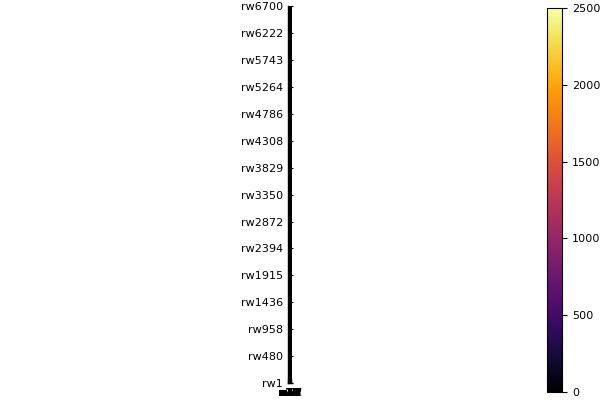

In [94]:
plot_visit_freq(am_caminatas)

In [95]:
"""
    freq_vertex_visits(W::Array{Any,1}, n::Int64)

Función que hace un diccionario con frecuencias para un nodo inicial
"""
function freq_vertex_visits(W::Array{Any,1}, n::Int64) #puede ser más eficiente llamando la función anterior sin nodo

    dicc = [] #arreglo vacío

    nodos = length(W) #tamaño de caminatas
    iter = size(W[1], 1) #núm de iteraciones
    diccionario = 0

    for j in 1:iter #corro por las iteraciones

        diccionario = countmap(W[n][j, :]) #hago diccionario de freqs de cada caminata

        push!(dicc, diccionario) #guardo el diccionario en un arreglo vacío

    end

    return dicc
end

freq_vertex_visits

In [96]:
fvv32=freq_vertex_visits(am_caminatas, 32) 

100-element Array{Any,1}:
 Dict(2=>2,11=>2,25=>3,66=>1,29=>1,59=>1,8=>1,33=>1,18=>2,26=>1…)     
 Dict(2=>1,11=>4,25=>1,55=>1,42=>1,29=>1,58=>1,59=>1,8=>1,57=>1…)     
 Dict(2=>1,11=>5,25=>1,55=>1,42=>2,29=>1,8=>1,57=>5,20=>3,14=>1…)     
 Dict(54=>1,32=>25,2=>2,40=>3,16=>7,11=>2,0=>2422,26=>1,25=>3,60=>1…) 
 Dict(2=>7,11=>19,39=>4,25=>11,55=>2,42=>3,29=>5,58=>1,66=>4,59=>4…)  
 Dict(2=>4,11=>2,25=>1,55=>1,66=>1,58=>1,8=>1,57=>2,52=>1,18=>2…)     
 Dict(2=>2,11=>10,25=>7,55=>2,42=>1,29=>2,66=>3,59=>2,8=>1,20=>2…)    
 Dict(2=>13,11=>6,39=>3,25=>4,55=>1,42=>3,29=>3,58=>2,59=>2,8=>1…)    
 Dict(18=>2,30=>2,41=>2,32=>36,52=>1,2=>5,40=>1,54=>1,16=>8,11=>4…)   
 Dict(54=>1,32=>6,16=>2,11=>1,0=>2482,25=>2,42=>2,3=>2,67=>1,27=>1…)  
 Dict(2=>7,11=>22,39=>3,25=>10,55=>2,42=>4,29=>4,58=>1,66=>2,59=>1…)  
 Dict(32=>9,50=>1,62=>1,0=>2482,42=>1,17=>1,59=>1,6=>1,20=>1,31=>1…)  
 Dict(32=>9,50=>1,62=>1,0=>2482,7=>1,42=>1,17=>1,59=>1,3=>1,31=>1…)   
 ⋮                                                 

In [97]:
#En la iteración 73 de la caminata con nodo inicial MEx(32), el nodo más visitado, con 276 veces fue MEX
fvv32[73][32]

276

In [98]:
"""
    distrib_vertex_visits(W::Array{Any,1}, n::Int64)

Función que crea un arreglo de arreglos con la distribución de frecuencias de visitas de un nodo inicial
"""
function distrib_vertex_visits(W::Array{Any,1}, n::Int64)

    x = freq_vertex_visits(W, n) #diccionario de frecuencias
    nodos = length(W)
    f = 0
    frec_total = [] #zeros(Array, length(x)) #arreglo de ceros de tamaño núm dicc
    frec_nodo = zeros(Int64, nodos+1) #arreglo de nodos de tamaño núm nodos para get frec

    for i in 1:length(x) #corro por los nodos

        for j in 1:nodos+1 #corro por los nodos

            frec_nodo[j] = get(x[i], f, 0) #entrada j de freq nodo la cambio por la entrada j del dicc i

            f += 1
        end
        popfirst!(frec_nodo)
        push!(frec_total, frec_nodo)

        f = 0
        frec_nodo = zeros(Int64, nodos+1)

    end

    return frec_total
end

distrib_vertex_visits

In [100]:
#Cada arreglo tiene 67 elementos
dvv32 = distrib_vertex_visits(am_caminatas, 32)

100-element Array{Any,1}:
 [1, 2, 2, 0, 1, 1, 1, 1, 1, 0  …  0, 1, 4, 0, 1, 1, 0, 1, 1, 1]  
 [1, 1, 0, 0, 1, 1, 2, 1, 2, 0  …  1, 1, 4, 1, 0, 0, 4, 5, 0, 1]  
 [2, 1, 0, 0, 0, 0, 0, 1, 2, 2  …  0, 0, 1, 0, 1, 1, 7, 4, 0, 1]  
 [0, 2, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 0, 1, 0, 0, 0, 0, 0, 2, 1]  
 [2, 7, 4, 2, 1, 4, 4, 0, 4, 6  …  1, 4, 8, 5, 6, 2, 13, 7, 4, 1] 
 [1, 4, 1, 1, 2, 0, 1, 1, 1, 1  …  1, 0, 9, 1, 0, 1, 6, 6, 1, 1]  
 [0, 2, 1, 0, 1, 0, 0, 1, 0, 0  …  0, 2, 1, 0, 0, 1, 1, 2, 3, 1]  
 [1, 13, 0, 3, 5, 1, 3, 1, 3, 5  …  2, 2, 12, 3, 3, 1, 3, 2, 0, 1]
 [2, 5, 0, 1, 0, 0, 0, 0, 0, 0  …  1, 1, 2, 0, 0, 0, 1, 4, 0, 1]  
 [0, 0, 2, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 1]  
 [5, 7, 2, 1, 5, 3, 2, 1, 3, 2  …  1, 1, 9, 4, 1, 3, 11, 9, 2, 1] 
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0  …  0, 1, 0, 0, 1, 0, 0, 0, 0, 1]  
 [0, 0, 1, 0, 0, 0, 1, 0, 0, 0  …  0, 1, 0, 0, 1, 0, 0, 0, 0, 1]  
 ⋮                                                                
 [0, 4, 0, 1, 2, 1, 0, 3, 2, 0  …  3

In [101]:
#Encontrar el máximo número de visitas
mm= []
for i in 1:100
    m=maximum(dvv32[i])
    push!(mm,m)
end
return mm
#maximum(mm)

100-element Array{Any,1}:
  33
  47
  59
  25
 168
  40
  46
 110
  36
   6
 137
   9
   9
   ⋮
  93
 141
  35
  75
  37
  21
  20
 133
  18
  23
  79
   7

In [102]:
dvv32[73][32]

276

In [167]:
"""
    plot_visit_freq_vertex(W::Array{Any,1}, n::Int64)

Función que hace un heatmap de los nodos en los que cae, cada renglón corresponde a una caminata
con cierto nodo inicial n.
"""
function plot_visit_freq_vertex(W::Array{Any,1}, n::Int64) #Con esta función se pierde la información de los nodos que caen en 0



    x = distrib_vertex_visits(W, n)
    #mat_completa = x
    mat_completa = transpose(hcat(x...))    #Se covierte en matriz el arreglo
    #mat = mat_completa[:, (2:end)]
    #mat = mat_completa
    mat = transpose(mat_completa)
    #pasos = size(W[1], 2)-1
    pasos = 300
    #@show mat[32,:]
    codigo = am_nombres[n]
    
    ys = [am_nombres]#[nombres_multiplex]
    xs = [string("it", i) for i = 1:length(x)]
    z = mat
    heatmap(xs, ys, z,
        title = "Frecuencia de visitas con vértice inicial $codigo",
        aspect_ratio = 1,
        grid = true,
        gridalpha = 0.1,
        clims = (0, pasos),
        ylabel = "Aeropuertos",
        xlabel = "Iteraciones",
        yticks = :all,
        xticks = 5:5:100,#:all,
        xrotation = 60,#70,
        size = (1200,800),
        c=ColorGradient([:white,:purple,:blue,:green,:yellow,:orange,:red,:black]),
        ytickfont = (4.2),
        xtickfont = (4.2)) #"Courier"))
end

plot_visit_freq_vertex

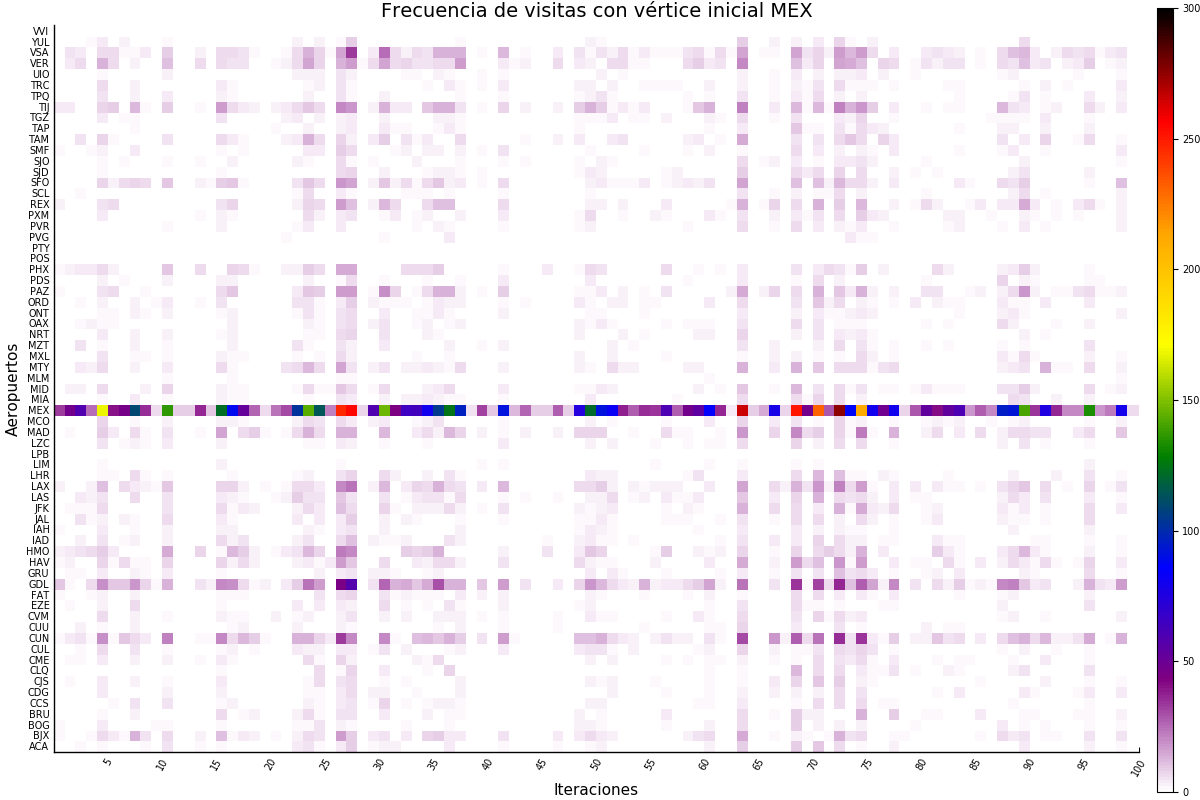

In [166]:
AM_visit_32 = plot_visit_freq_vertex(am_caminatas, 32)                                                                                                         

In [133]:
savefig(AM_visit_32, "/Users/yuriko/Documents/UNAM/Tesis_Lic/Images/AM_visits_32.pdf")

Claramente se ve que el nodo más visitado es MEX, que es el hub y tiene mayor grado que todos y demás medidas...

In [135]:
am_nombres[32]

"MEX"

In [136]:
am_nombres[60]

"TIJ"

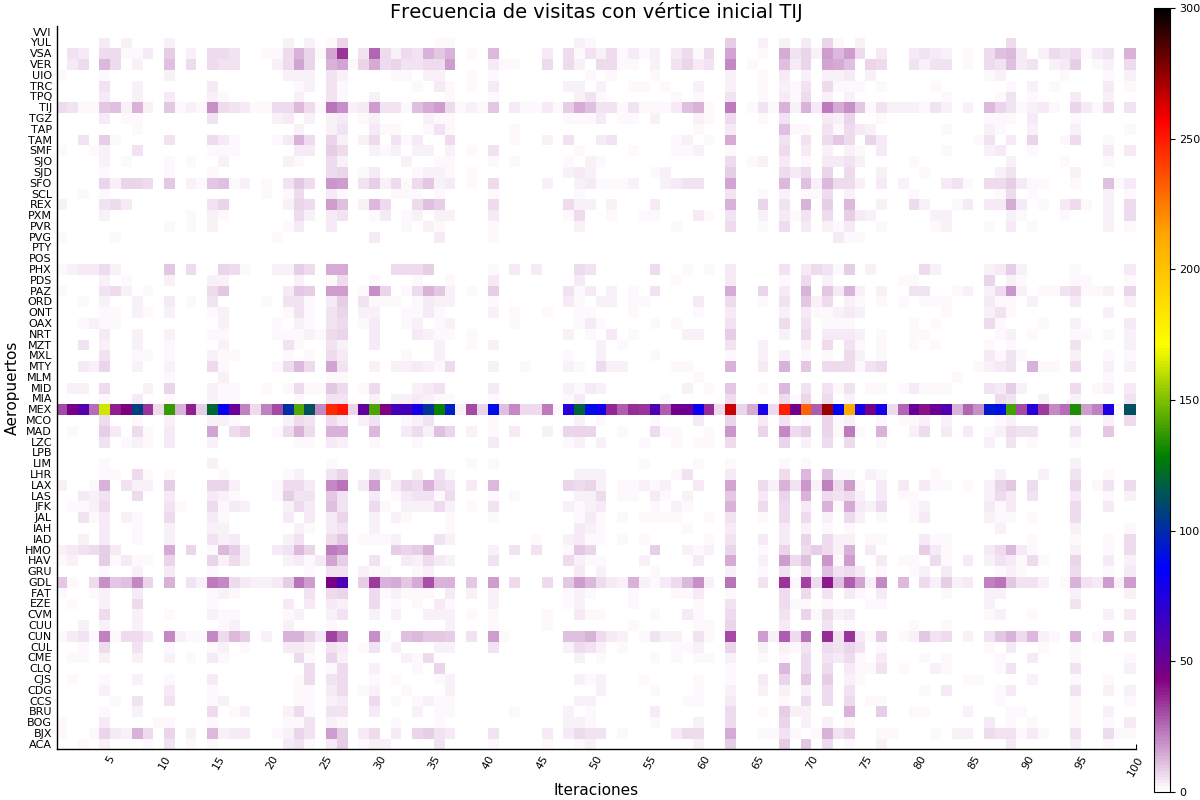

In [138]:
AM_visit_60 = plot_visit_freq_vertex(am_caminatas, 60)

Este es el heatmap, saliendo de TIJ, vértice 60. De igual forma, el hub es MEX.

In [139]:
savefig(AM_visit_60, "/Users/yuriko/Documents/UNAM/Tesis_Lic/Images/AM_visits_60.pdf")

In [140]:
am_nombres[27]

"LIM"

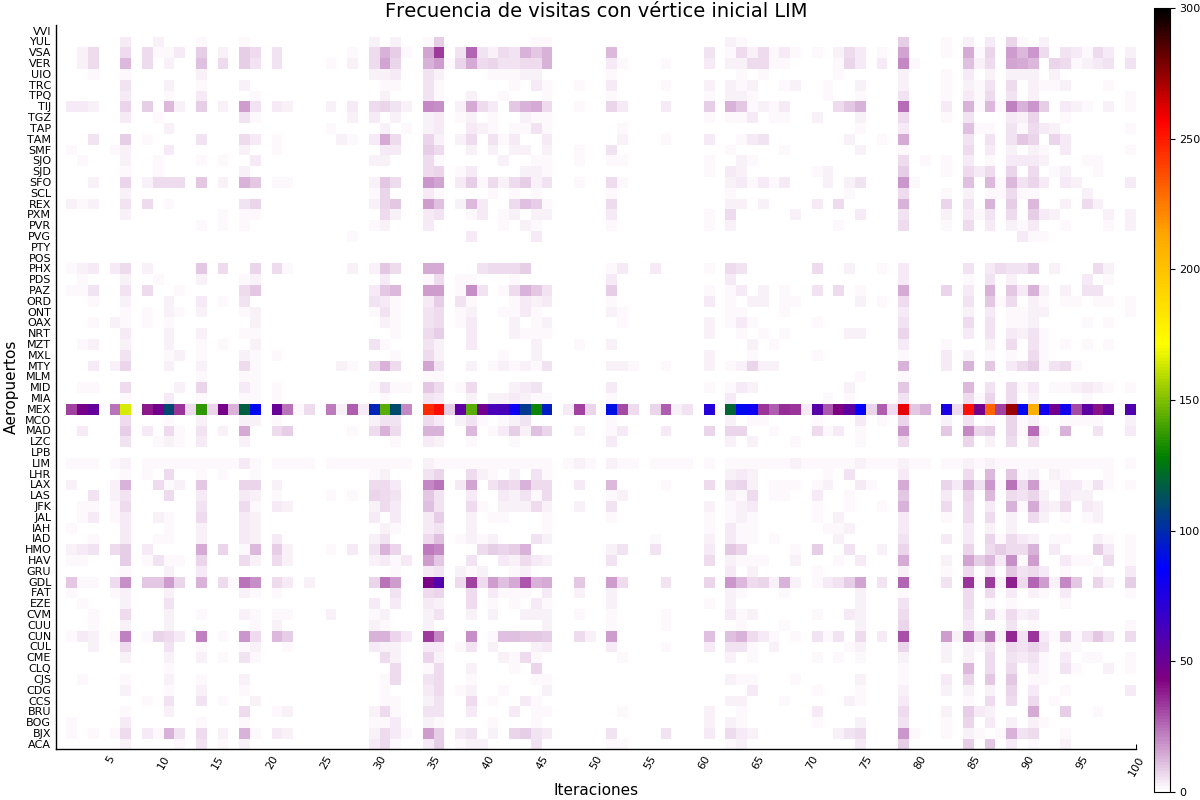

In [144]:
AM_visit_27 = plot_visit_freq_vertex(am_caminatas, 27)

Este es el heatmap, saliendo de..., vértice 27. De igual forma, el hub es MEX.

In [145]:
savefig(AM_visit_27, "/Users/yuriko/Documents/UNAM/Tesis_Lic/Images/AM_visits_27.pdf")

In [147]:
am_nombres[28]

"LPB"

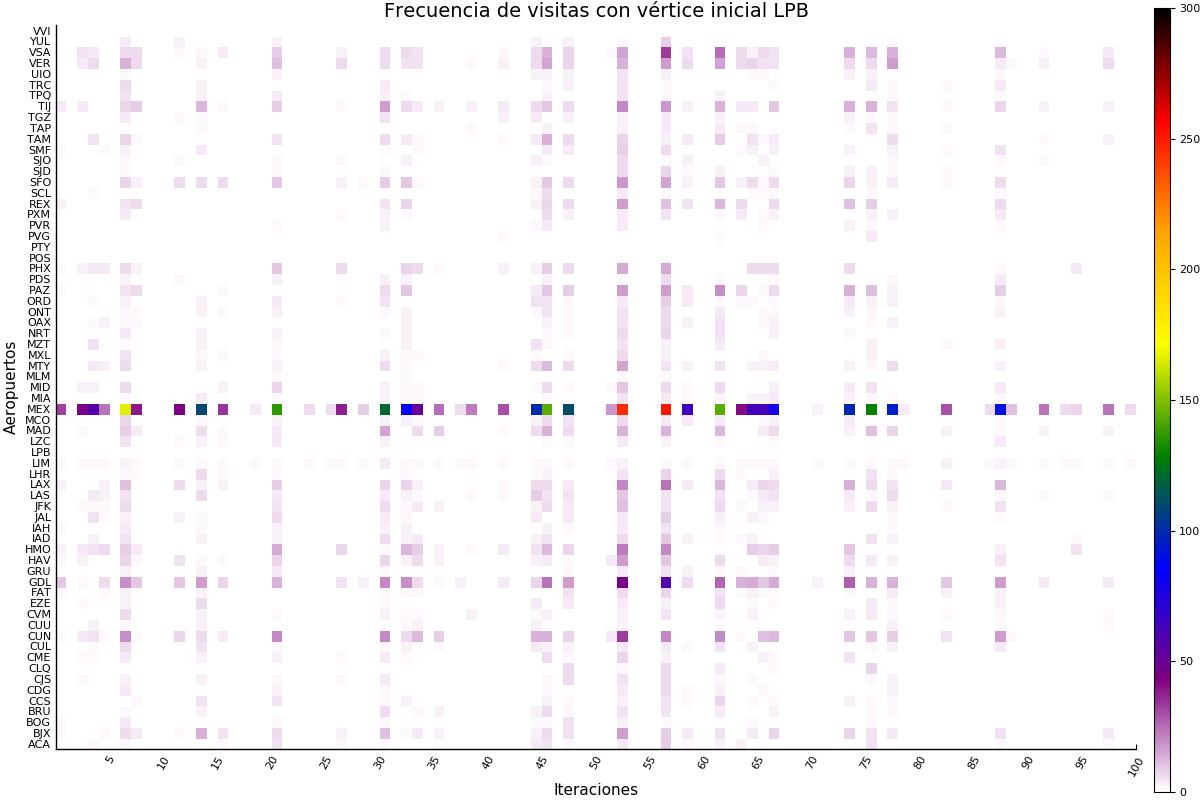

In [149]:
AM_visit_28 = plot_visit_freq_vertex(am_caminatas, 28)

In [150]:
savefig(AM_visit_28, "/Users/yuriko/Documents/UNAM/Tesis_Lic/Images/AM_visits_28.pdf")

In [155]:
am_nombres[46]

"POS"

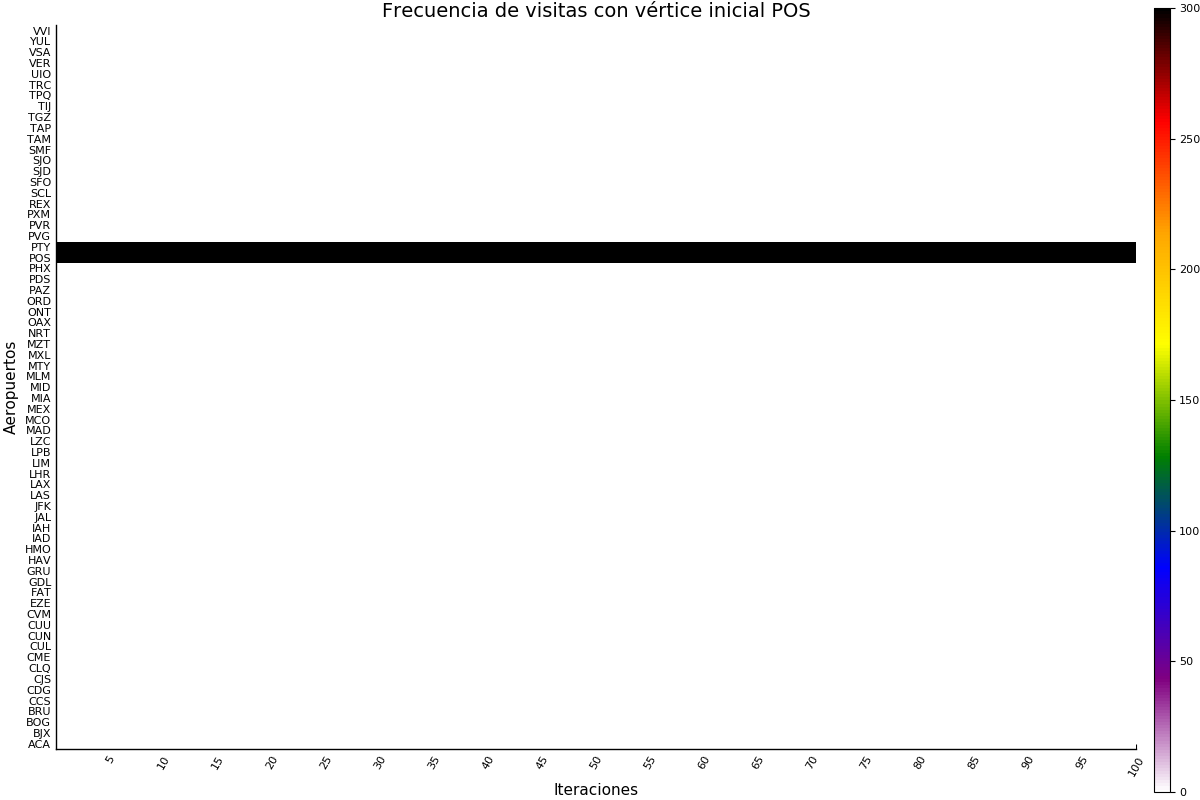

In [156]:
AM_visit_46 = plot_visit_freq_vertex(am_caminatas, 46)

In [157]:
savefig(AM_visit_46, "/Users/yuriko/Documents/UNAM/Tesis_Lic/Images/AM_visits_46.pdf")

In [158]:
"""
    distrib_av_visits(W::Array{Any, 1})

Función que hace una distribución de visitas por nodo inicial y muestra todos los nodos iniciales
"""
function distrib_av_visits(W::Array{Any, 1})

    nodos = length(W) #número de nodos
    iteracion = size(W[1],1)
    #dicc = zeros(Float64, nodos, nodos+1) #matriz de ceros (nodos x nodos+1)
    dicc = zeros(Float64, nodos, nodos)
    
    for i in 1:nodos #(1 a 17)
        prom_conteos = counts(W[i], 1:nodos)/iteracion #hago diccionario con prom de freqs de cada nodo inicial #0:nodos
        #@show prom_conteos
        dicc[i, :] = prom_conteos
    end

    dicc
end

distrib_av_visits

In [159]:
#Distribución promedio de visitas por nodo inicial
#Es el promedio de visitas a cada aeropuerto en las 100 iteraciones
dav = distrib_av_visits(am_caminatas)

67×67 Array{Float64,2}:
 2.46  2.88  1.01  1.34  1.16  1.06  …  1.24  1.06  4.4   4.77  1.09  1.0
 1.41  3.92  0.98  1.36  1.19  1.04     1.17  1.0   4.45  4.88  1.04  1.0
 1.46  2.88  2.01  1.34  1.16  1.06     1.24  1.06  4.4   4.77  1.09  1.0
 1.42  2.89  1.11  2.91  1.17  1.12     1.21  1.04  4.67  5.06  1.08  1.0
 1.46  2.88  1.01  1.34  2.16  1.06     1.24  1.06  4.4   4.77  1.09  1.0
 1.46  2.88  1.01  1.34  1.16  2.06  …  1.24  1.06  4.4   4.77  1.09  1.0
 1.46  2.88  1.01  1.34  1.16  1.06     1.24  1.06  4.4   4.77  1.09  1.0
 1.46  2.88  1.01  1.34  1.16  1.06     1.24  1.06  4.4   4.77  1.09  1.0
 1.46  2.88  1.01  1.34  1.16  1.06     1.24  1.06  4.4   4.77  1.09  1.0
 1.44  2.96  1.01  1.36  1.17  1.05     1.21  1.05  4.37  4.75  1.08  1.0
 1.41  2.8   1.05  1.41  1.15  1.08  …  1.25  1.04  4.5   4.91  1.06  1.0
 1.46  2.88  1.01  1.34  1.16  1.06     1.24  1.06  4.4   4.77  1.09  1.0
 1.46  2.88  1.01  1.34  1.16  1.06     1.24  1.06  4.4   4.77  1.09  1.0
 ⋮            

In [160]:
#Encontrar el máximo número de visitas
mm= []
for i in 1:67
    m=maximum(dav[i,:])
    push!(mm,m)
end
return mm
sort(mm)

67-element Array{Any,1}:
    1.0 
   29.6 
   57.42
   63.74
   64.32
   64.35
   64.39
   64.44
   64.48
   64.53
   64.56
   64.56
   64.57
    ⋮   
   65.51
   65.62
   65.68
   65.74
   65.87
   65.96
   66.06
   66.2 
   66.61
   67.76
 1251.0 
 1251.0 

In [161]:
#Este anterior tiene el promedio en que cayó en un "cero"
#distrib_av_visits(am_caminatas)

In [176]:
"""
    plot_freq_av_visits(W::Array{Any, 1})

Función que crea un diccionario con frecuencias por nodo inicial y muestra todos
"""
function plot_freq_av_visits(W::Array{Any, 1}, airline_code::String)



    mat_completa = distrib_av_visits(W)
    
    mat = mat_completa
    #mat = mat_completa[:, (2:end)] #desde la segunda columna para no tomar en cuenta los end-points
    #Hasta aquí tengo una matriz en donde cada renglón corresponde a un nodo inicial cada columna
    #corresponde al promedio de visitas por el nodo "num_columna"

    #Ahora quiero
    datos = transpose(mat)

    aerolinea_matriz = string(airline_code, "_matriz_du.csv")
    #nombres_multiplex = airport_names("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/$aerolinea_matriz")
    nombres_multiplex = am_nombres
    
    xs = [nombres_multiplex]
    ys = [nombres_multiplex] #[string("v_0 ", i) for i = 1:length(W)]
    z = datos
    #@show datos[1,:]
@show maximum(mat)
    heatmap(xs, ys, z,
        title = string("Frecuencia de visitas de ", airline_code),
        aspect_ratio = 1,
        clims = (0, 100),#maximum(mat)), #MÁXIMO DEL MULTIPLEX GLOBAL/AEROLÍNEA MÁS GRANDE ¿?
        grid = true,
        gridalpha = 0.1,
        xticks = :all,
        yticks = :all,
        size = (1200, 1200),
        #gridalpha = 0,
        xtickfont = (7), #"Courier"),
        ytickfont = (7), #"Courier"),
        xlabel = "Aeropuerto inicial",
        ylabel = "Visitas promedio",
        c=ColorGradient([:white,:purple,:blue,:green,:yellow,:orange,:red,:black]),
        xrotation = 70)
end

plot_freq_av_visits

maximum(mat) = 1251.0


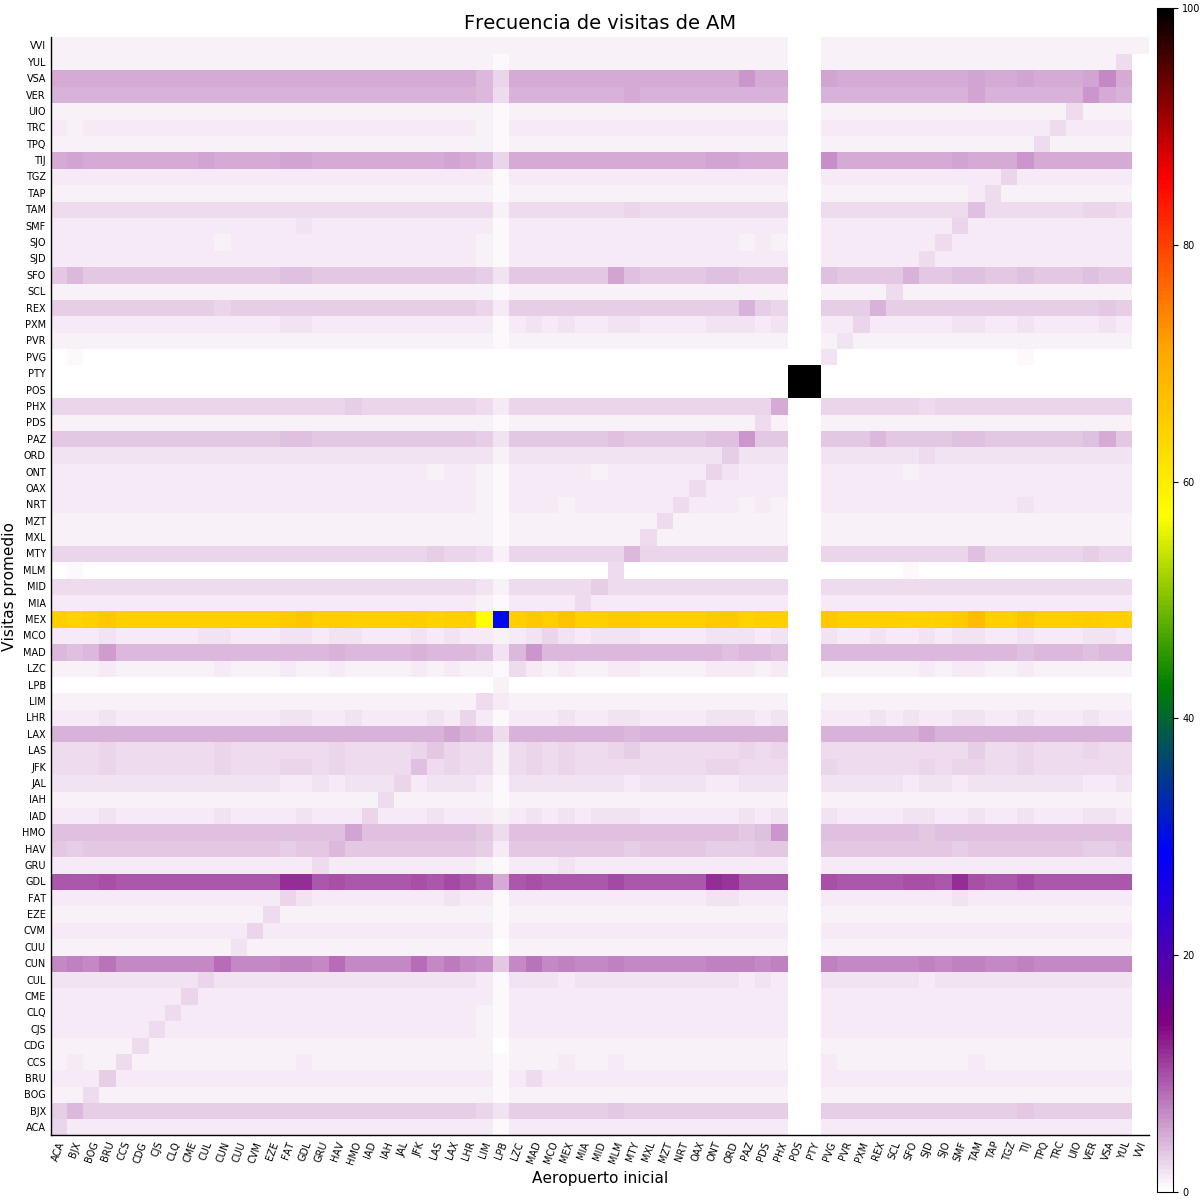

In [178]:
AM_visit = plot_freq_av_visits(am_caminatas, "AM")

In [179]:
savefig(AM_visit, "/Users/yuriko/Documents/UNAM/Tesis_Lic/Images/AM_visits.pdf")

### Longitudes

In [180]:
"""
    walk_length(W::Array{Any,1})

La función walk_length tiene como parámetros:
RW, arreglo de arreglos de tipo Array{Any,1} que corresponde al arreglo de caminatas aleatorias.
La función regresa un arreglo de arreglos que contiene las longitudes de todas las trayectorias que tomó el
caminante aleatorio para cada nodo inicial de la red.
"""
function walk_length(W::Array{Any,1})

    longitudes = Array[]

    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #Es el número de iteraciones
    longitud = zeros(Int64, s)

    for i in 1:v

        for j in 1:s

            longitud[j] = findlast(x -> x != 0, W[i][j, :])

        end
         push!(longitudes, longitud)

        longitud = zeros(Int64, s)
    end
    return longitudes

end

walk_length

In [181]:
walk_length(am_caminatas)

67-element Array{Array,1}:
 [102, 122, 154, 79, 467, 139, 133, 296, 111, 19  …  278, 286, 413, 111, 211, 91, 61, 74, 362, 51]
 [102, 122, 154, 79, 467, 139, 133, 296, 111, 19  …  47, 278, 286, 413, 111, 211, 91, 61, 74, 362]
 [102, 122, 154, 79, 467, 139, 133, 296, 111, 19  …  278, 286, 413, 111, 211, 91, 61, 74, 362, 51]
 [102, 122, 154, 79, 467, 139, 133, 296, 111, 19  …  111, 211, 91, 61, 74, 362, 51, 61, 252, 321] 
 [102, 122, 154, 79, 467, 139, 133, 296, 111, 19  …  278, 286, 413, 111, 211, 91, 61, 74, 362, 51]
 [102, 122, 154, 79, 467, 139, 133, 296, 111, 19  …  278, 286, 413, 111, 211, 91, 61, 74, 362, 51]
 [102, 122, 154, 79, 467, 139, 133, 296, 111, 19  …  278, 286, 413, 111, 211, 91, 61, 74, 362, 51]
 [102, 122, 154, 79, 467, 139, 133, 296, 111, 19  …  278, 286, 413, 111, 211, 91, 61, 74, 362, 51]
 [102, 122, 154, 79, 467, 139, 133, 296, 111, 19  …  278, 286, 413, 111, 211, 91, 61, 74, 362, 51]
 [102, 122, 154, 79, 467, 139, 133, 296, 111, 19  …  278, 286, 413, 111, 211, 91, 

In [182]:
walk_length(am_caminatas)[32]

100-element Array{Int64,1}:
 102
 122
 154
  79
 467
 139
 133
 296
 111
  19
 392
  19
  19
   ⋮
 286
 413
 111
 211
  91
  61
  74
 362
  51
  61
 252
  15

In [183]:
#Archivo de longitudes de caminatas con nodo inicial en MEX-32
#Regresa las longitudes de todas las trayectorias que tomó el caminante aleatorio para cada nodo inicial de la red.
AM_32_longitud = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/longitudes/AM_32_walk_lengths.csv", ',', Int64)

100×1 Array{Int64,2}:
 102
 122
 154
  79
 467
 139
 133
 296
 111
  19
 392
  19
  19
   ⋮
 286
 413
 111
 211
  91
  61
  74
 362
  51
  61
 252
  15

In [184]:
#Archivo de longitudes de caminatas con nodo inicial en LIM-27
#Regresa las longitudes de todas las trayectorias que tomó el caminante aleatorio para cada nodo inicial de la red.
AM_27_longitud = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/longitudes/AM_27_walk_lengths.csv", ',', Int64)

100×1 Array{Int64,2}:
   2
 101
 122
 154
   2
  78
 467
   2
 138
 133
 296
 111
  19
   ⋮
 761
 271
 659
 212
 133
 253
  97
 137
 147
 133
   2
 156

In [185]:
"""
    walk_av_length(W::Array{Any,1})

La función walk_av_length tiene como parámetro W, que es un arreglo de arreglos (que se puede obtener de la
función walk_length).
Regresa un arreglo con entradas correspondientes al promedio de las longitudes de
las caminatas aleatorias para cada nodo de inicio antes de caer en un nodo con grado de salida 0.
"""
function walk_av_length(W::Array{Any,1}) #Llamar a función

    proms = Array{Float64}(undef, 0)
    wlength = walk_length(W)

    for i in 1:length(wlength)
        av = mean(wlength[i])
        push!(proms, av)
    end
    proms
end

walk_av_length

In [186]:
walk_av_length(am_caminatas)

67-element Array{Float64,1}:
 191.53
 191.03
 191.53
 197.84
 191.53
 191.53
 191.53
 191.53
 191.53
 191.53
 192.13
 191.53
 191.53
   ⋮   
 197.84
 202.78
 191.53
 191.53
 197.84
 191.53
 191.53
 191.53
 194.64
 194.64
 191.53
   1.0 

In [253]:
"""
    plot_av_length_vertex(W::Array{Float64, 1}, airline_code::String)

Función que grafica (scatter plot) del promedio por nodo inicial de caminatas
"""
function plot_av_length_vertex(W::Array{Any,1}, airline_code::String)



    info = walk_av_length(W)
    aerolinea_matriz = string(airline_code, "_matriz_du.csv")
    aerolinea_matriz = am_matriz
   # nombres_multiplex = airport_names("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/matriz/AM_import_matrix.csv")
    nombres_multiplex = am_nombres[:,1]
    
    
    #boxplot(["Longitud promedio"],info,leg=false, alpha=0.8, bar_width= 0.2, color="#304878")
    scatter(info,
        color = "#304878",
        alpha = 0.8,
        title = string("Longitud de caminatas promedio por nodo inicial de ", airline_code),
        grid = true,
        gridalpha = 0.1,
        minorgridalpha = 0.01,
        xticks = (1:1:length(W), nombres_multiplex), #data_names_multiplex), 1:1:length(W), 
        xlabel = "Aeropuerto inicial",
        ylabel = "Longitud",
        legend = false,
        legendtitle = airline_code,
        label = "Promedio",
        xtickfont = (7), #"Courier"),
        ytickfont = (7), #"Courier"),
        xrotation = 70,
        size = (1200, 800),
        ylims = (0, 2500))
end

plot_av_length_vertex

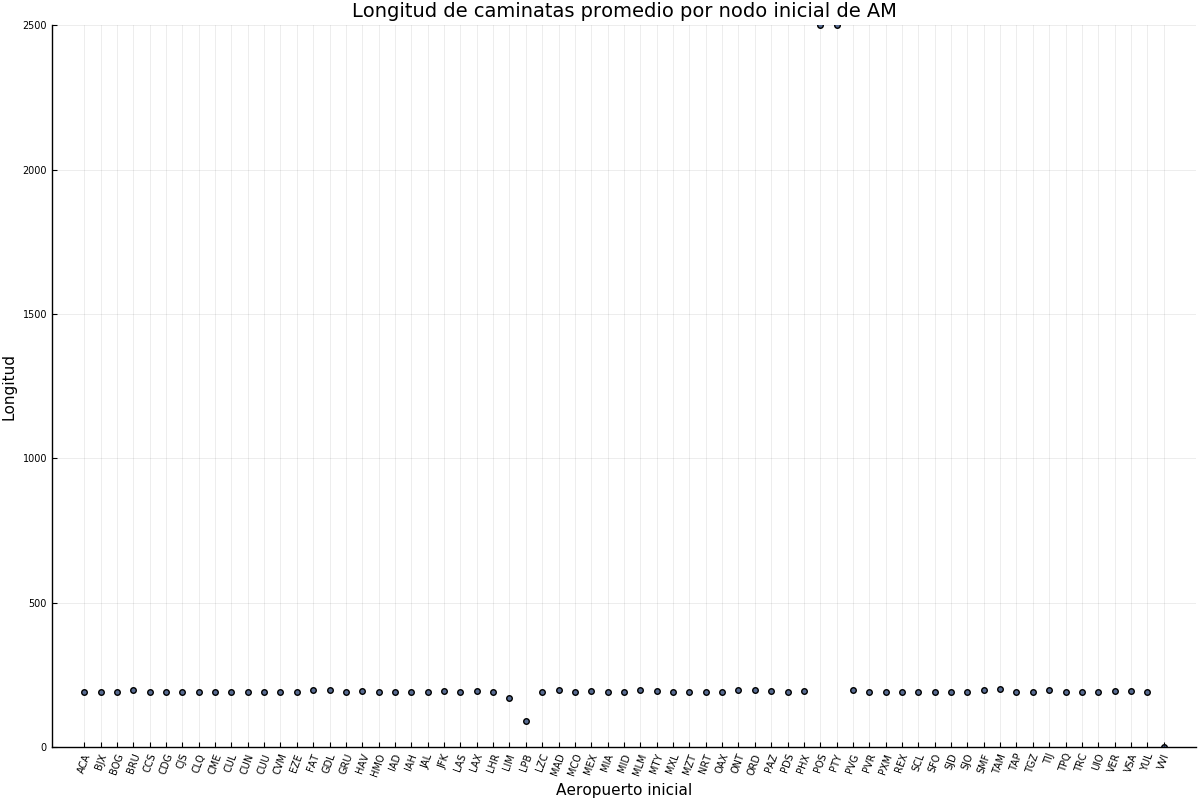

In [254]:
plot_av_length_vertex(am_caminatas, "AM")

┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(::PyObject) at PyCall.jl:407
└ @ PyCall /Users/yuriko/.julia/packages/PyCall/ttONZ/src/PyCall.jl:407
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[234]:12
└ @ Core In[234]:12
┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = top-level scope at In[234]:13
└ @ Core In[234]:13
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[234]:14
└ @ Core In[234]:14
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.

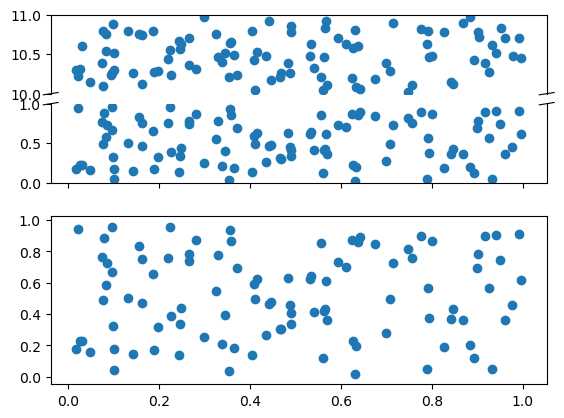

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[234]:28
└ @ Core In[234]:28
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[234]:28
└ @ Core In[234]:28
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[234]:29
└ @ Core In[234]:29
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[234]:29
└ @ Core In[234]:29
┌ Warning: `getindex(o::PyObject, s::Symbol)` is depreca

PyObject <matplotlib.collections.PathCollection object at 0x15fefc908>

In [234]:
using PyPlot, PyCall
@pyimport mpl_toolkits.axes_grid1 as axes_grid1

info = walk_av_length(am_caminatas)
#x = rand(100)
#y = rand(100)
#y2 = rand(100).+10

fig, axes = subplots(nrows=2, sharex=true)

ax = axes[1]
divider = axes_grid1.make_axes_locatable(ax)
ax2 = divider[:new_vertical](size="100%", pad=0.1)
fig[:add_axes](ax2)

ax[:scatter](x, y)
ax[:set_ylim](0, 1)
ax[:spines]["top"][:set_visible](false)

ax2[:scatter](x, y2)
ax2[:set_ylim](10, 11)
ax2[:tick_params](bottom="off", labelbottom="off")
ax2[:spines]["bottom"][:set_visible](false)


# From https://matplotlib.org/examples/pylab_examples/broken_axis.html
d = 0.015  # how big to make the diagonal lines in axes coordinates
ax2[:plot]((-d, +d), (-d, +d), transform=ax2[:transAxes], color="k", clip_on=false,linewidth=0.8)        # top-left diagonal
ax2[:plot]((1 - d, 1 + d), (-d, +d), transform=ax2[:transAxes], color="k", clip_on=false,linewidth=0.8)  # top-right diagonal

ax[:plot]((-d, +d), (1 - d, 1 + d), transform=ax[:transAxes], color="k", clip_on=false,linewidth=0.8)  # bottom-left diagonal
ax[:plot]((1 - d, 1 + d), (1 - d, 1 + d), transform=ax[:transAxes], color="k", clip_on=false,linewidth=0.8)  # bottom-right diagonal


#create bottom subplot as usual
axes[2][:scatter](x, y)


In [ ]:
savefig(AM_visit_60, "/Users/yuriko/Documents/UNAM/Tesis_Lic/Images/AM_visits_60.pdf")*_

In [255]:
"""
    walk_layer_length(W::Array{Any,1})
Función que saca el promedio de longitud de caminata en la capa
"""
function walk_layer_length(W::Array{Any,1})

    x = walk_av_length(W)
    av = mean(x)

    return av
end


walk_layer_length

In [256]:
#PROMEDIO DE LONGITUD DE CAMINATAS ALEATORIAS EN AM ANTES DE LLEGAR A UN ENDPOINT
am_layer_long = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/longitudes/AM_walk_layer_length.csv", ',')

1×1 Array{Float64,2}:
 257.37402985074624

In [257]:
"""
    max_length(W::Array{Any, 1})

Da la longitud máxima de cada iteración de cada nodo inicial.
"""
function max_length(W::Array{Any, 1})
    max = Array{Int64}(undef, 0)
    x = coverage(W)
    for i in 1:length(x)
        m = maximum(x[i])
        push!(max, m)
    end
    max
end


max_length

In [258]:
am_max_long = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/longitudes/AM_max_length.csv", ',', Int64)

1×1 Array{Int64,2}:
 65

In [259]:
"""
    Max_length(W::Array{Any, 1})

Da la longitud máxima total por todos los nodos.
"""
function Max_length(W::Array{Any, 1})
    x = max_length(W)
    m = maximum(x)
    return m
end


Max_length

In [260]:
"""
    av_max_length(W::Array{Any, 1})

Regresa el promedio de la longitud máxima de cada nodo inicial.
"""
function av_max_length(W::Array{Any, 1})
    x = max_length(W)
    prom = mean(x)
    return prom
end


av_max_length

In [261]:
am_avmax_long = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/longitudes/AM_av_max_length.csv", ',')

1×1 Array{Float64,2}:
 62.17910447761194

In [262]:
"""
    min_length(W::Array{Any, 1})

Da la longitud mínima de cada iteración de cada nodo inicial.
"""
function min_length(W::Array{Any, 1})
    min = Array{Int64}(undef, 0)
    x = coverage(W)
    for i in 1:length(x)
        m = minimum(x[i])
        push!(min, m)
    end
    min
end


min_length

In [263]:
am_min_long = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/longitudes/AM_min_length.csv", ',', Int64)

1×1 Array{Int64,2}:
 65

In [264]:
"""
    Min_length(W::Array{Any, 1})

Da la longitud mínima total.
"""
function Min_length(W::Array{Any, 1})
    x = min_length(W)
    m = minimum(x)
    return m
end


Min_length

In [265]:
"""
    av_min_length(W::Array{Any, 1})

Regresa el promedio de la longitud mínima de cada nodo inicial.
"""
function av_min_length(W::Array{Any, 1})
    x = min_length(W)
    prom = mean(x)
    return prom
end


av_min_length

In [266]:
am_avmin_long = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/longitudes/AM_av_min_length.csv", ',')

1×1 Array{Float64,2}:
 6.3283582089552235

### Cobertura

In [267]:
"""
    coverage(W::Array{Any,1})

La función cobertura tiene como parámetro W que es un arreglo de arreglos.
Regresa el número de nodos diferentes a los que llega el caminante.
"""
function coverage(W::Array{Any,1})

    cobert = []

    v = length(W) #tamaño de la matriz, número de nodos
    x = visited_vertices(W)
    s = size(x[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    longz = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones

    for i in 1:v
        for j in 1:s
            a = x[i][j]
            #deleteat!(a, findall(k->k==0, a)) #Para quitar si hay ceros
            l = length(a)
            longz[j] = l
        end

        push!(cobert, longz)
        longz = zeros(Int64, s)
    end

    return cobert
end

coverage

In [280]:
visited_vertices(am_caminatas)[32]

100-element Array{Any,1}:
 [32, 29, 26, 24, 22, 21, 19, 45, 62, 60  …  41, 53, 18, 63, 59, 66, 54, 33, 27, 67]
 [32, 17, 24, 13, 20, 9, 65, 64, 34, 18  …  6, 61, 49, 30, 57, 22, 19, 45, 27, 67]  
 [32, 17, 20, 9, 64, 52, 12, 1, 55, 38  …  8, 63, 23, 19, 45, 29, 18, 33, 27, 67]   
 [32, 66, 54, 25, 19, 45, 40, 37, 16, 56  …  60, 15, 58, 26, 18, 11, 23, 42, 27, 67]
 [32, 17, 7, 62, 50, 31, 6, 61, 49, 20  …  40, 36, 51, 43, 5, 26, 52, 4, 27, 67]    
 [32, 9, 7, 52, 50, 33, 30, 10, 60, 16  …  58, 11, 23, 3, 1, 66, 48, 55, 27, 67]    
 [32, 25, 11, 30, 18, 20, 19, 16, 53, 35  …  26, 31, 55, 56, 15, 41, 64, 50, 27, 67]
 [32, 25, 16, 53, 44, 20, 18, 11, 14, 61  …  64, 57, 17, 6, 49, 65, 37, 55, 27, 67] 
 [32, 17, 53, 58, 40, 26, 16, 41, 13, 2  …  15, 37, 64, 20, 14, 12, 59, 31, 27, 67] 
 [32, 25, 16, 42, 3, 54, 11, 18, 27, 67]                                            
 [32, 36, 24, 30, 11, 25, 23, 22, 17, 7  …  56, 15, 54, 58, 40, 13, 8, 50, 27, 67]  
 [32, 17, 6, 62, 50, 31, 20, 59, 42, 27

In [270]:
#cobertura de cada iteración de las caminatas con nodo inicial 32 (MEX)
c32 = coverage(am_caminatas)[32]

100-element Array{Int64,1}:
 43
 47
 44
 26
 61
 43
 42
 54
 39
 10
 61
 11
 11
  ⋮
 52
 61
 39
 49
 37
 28
 26
 59
 24
 28
 57
  9

In [271]:
#Cobertura promedio de las caminatas con nodo inicial 32 (MEX)
mean(c32)

40.3

In [284]:
#Coberturas de cada iteración por cada uno de los 67 nodos iniciales
coverage(am_caminatas)

67-element Array{Any,1}:
 [41, 46, 45, 27, 60, 43, 43, 56, 40, 14  …  54, 56, 61, 37, 51, 36, 28, 30, 60, 26]
 [41, 47, 44, 26, 60, 43, 42, 56, 40, 13  …  26, 54, 54, 61, 38, 50, 36, 28, 28, 60]
 [41, 47, 46, 27, 60, 43, 42, 57, 41, 13  …  54, 56, 61, 38, 50, 36, 28, 30, 60, 26]
 [42, 48, 45, 28, 61, 42, 43, 56, 38, 13  …  37, 49, 34, 27, 25, 59, 22, 28, 56, 60]
 [41, 46, 46, 27, 60, 43, 42, 56, 41, 14  …  54, 55, 62, 37, 50, 36, 29, 29, 60, 25]
 [41, 46, 46, 27, 60, 44, 43, 56, 41, 14  …  55, 55, 61, 37, 50, 35, 28, 29, 60, 26]
 [41, 46, 46, 27, 60, 44, 43, 56, 41, 14  …  54, 56, 61, 37, 50, 36, 29, 29, 60, 25]
 [41, 46, 45, 27, 61, 43, 42, 56, 41, 14  …  54, 55, 61, 38, 50, 35, 28, 30, 60, 26]
 [41, 46, 45, 27, 60, 44, 43, 56, 41, 14  …  55, 55, 61, 38, 50, 35, 29, 30, 60, 26]
 [42, 47, 45, 28, 60, 43, 43, 56, 40, 14  …  54, 55, 61, 37, 50, 35, 29, 30, 60, 26]
 [42, 47, 45, 27, 61, 41, 42, 54, 39, 13  …  52, 61, 40, 49, 36, 27, 25, 59, 25, 28]
 [42, 46, 45, 26, 60, 44, 43, 56, 40, 14

In [285]:
"""
    vertex_coverage(W::Array{Any,1})

Da el promedio de cobertura la caminata por nodo inicial.
"""
function vertex_coverage(W::Array{Any,1}) #Esta es la importante

    longitud = Array{Float64}(undef, 0)
    x = coverage(W)
#@show x
    for i in 1:length(x)
        l = mean(x[i])
        push!(longitud, l)
    end

    longitud
end

vertex_coverage

In [286]:
#COBERTURA PROMEDIO POR NODO INICIAL
vertex_coverage(am_caminatas)

67-element Array{Float64,1}:
 39.55
 39.32
 39.63
 40.91
 39.64
 39.66
 39.57
 39.59
 39.51
 39.52
 39.59
 39.62
 39.57
  ⋮   
 40.92
 41.6 
 39.63
 39.5 
 40.81
 39.64
 39.57
 39.6 
 39.94
 39.96
 39.64
  1.0 

In [287]:
#MAL
#El promedio de cobertura por nodo inicial
am_vert_cob = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/cobertura/AM_vertex_coverage.csv", ',');

In [288]:
am_vert_cob[32];

In [300]:
"""
    plot_vertex_coverage(W::Array{Any, 1}, airline_code::String)

Función que grafica (scatter plot) del promedio por nodo inicial de caminatas
"""
function plot_vertex_coverage(W::Array{Any, 1}, airline_code::String)

    info = vertex_coverage(W)

    #aerolinea_matriz = string(airline_code, "_matriz_du.csv")
    #nombres_multiplex = airport_names("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/$aerolinea_matriz")
    nombres_multiplex = am_nombres[:,1]
    cc32 = info[32]
 
    scatter(info,
        color = "#304878",
        alpha = 1,
        title = string("Área de contagio por nodo inicial ", airline_code),
        xlabel = "Aeropuerto inicial",
        ylabel = "Contagio promedio",
        xticks = (1:1:length(W), nombres_multiplex),
        legend = true,
        legendtitle = "MEX",
        label = "$cc32",
        xtickfont = (7), #"Courier"),
        ytickfont = (7), #"Courier"),
        size = (1200, 800),
        xrotation = 50,
        ylims = (0, 45))
    boxplot!(info)

end

plot_vertex_coverage

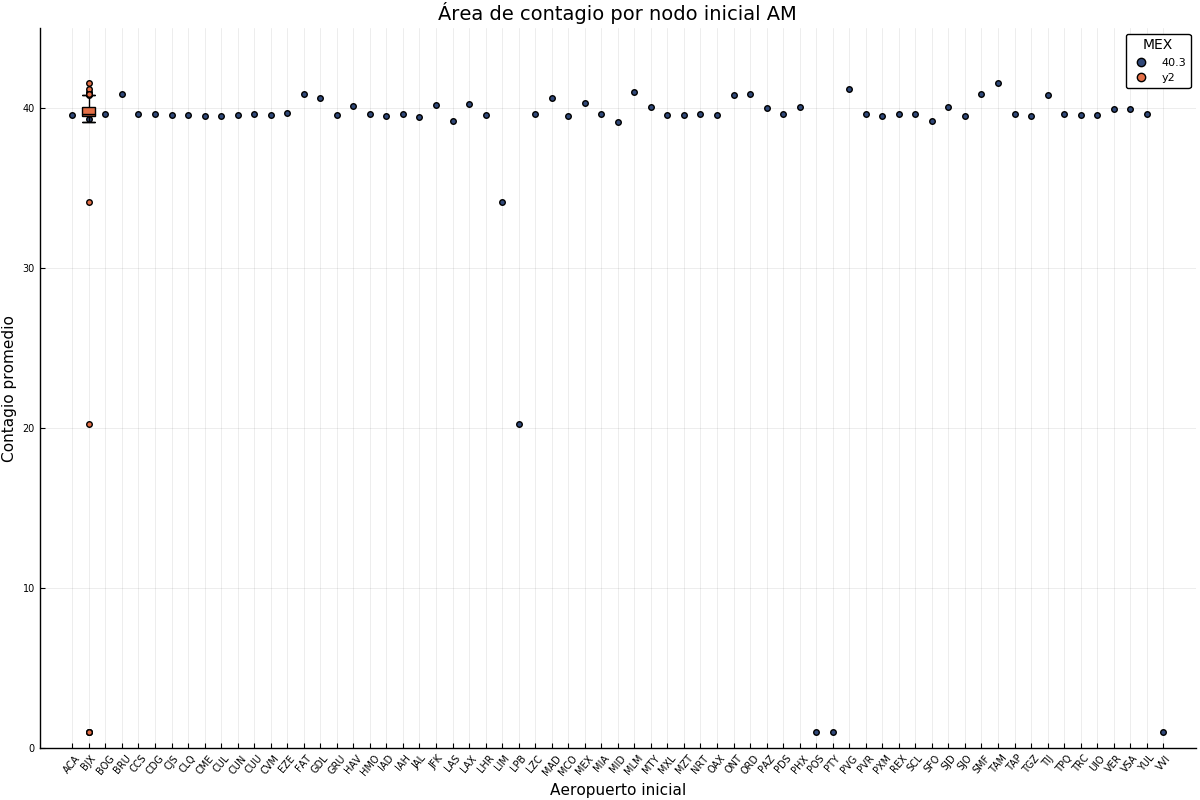

In [301]:
plot_vertex_coverage(am_caminatas, "AM")

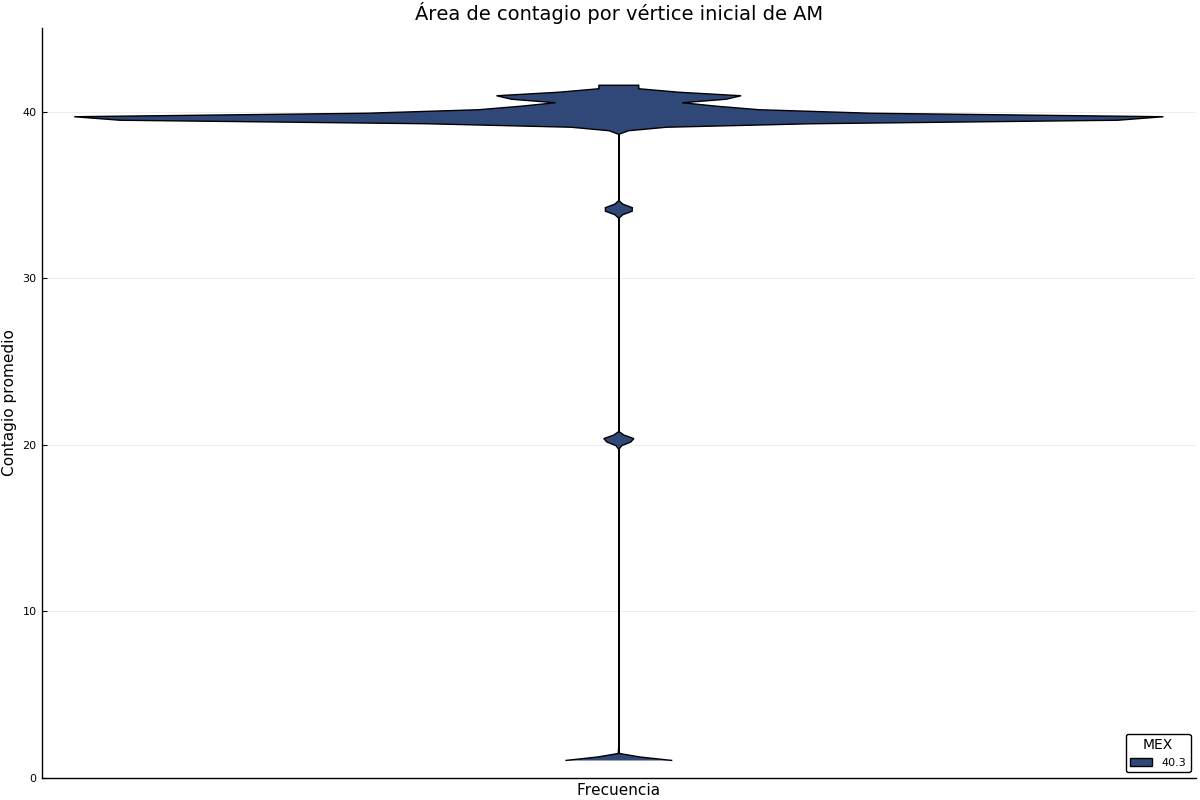

In [326]:
info = vertex_coverage(am_caminatas)

    #aerolinea_matriz = string(airline_code, "_matriz_du.csv")
    #nombres_multiplex = airport_names("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/$aerolinea_matriz")
    nombres_multiplex = am_nombres[:,1]
    cc32 = info[32]
    
    AM_cob_v0s = violin(info,
        color = "#304878",
        alpha = 1,
        title = string("Área de contagio por vértice inicial de AM"),
        xlabel = "Frecuencia",
        ylabel = "Contagio promedio",
        #xticks = (1:1:length(am_caminatas), nombres_multiplex),
        legend = :bottomright,
        legendtitle = "MEX",
        label = "$cc32",
        xticks = false,
        #xtickfont = (7), #"Courier"),
        #ytickfont = (7), #"Courier"),
        size = (1200, 800),
        #xrotation = 50,
        ylims = (0, 45))
    #boxplot!(info)



In [327]:
savefig(AM_cob_v0s, "/Users/yuriko/Documents/UNAM/Tesis_Lic/Images/AM_cobs_v0s.pdf")

In [328]:
"""
    layer_coverage(W::Array{Any, 1})

Da el promedio de la longitud de las caminatas para todos los nodos, como un número.
"""
function layer_coverage(W::Array{Any, 1})
    x = vertex_coverage(W)
    promedio = mean(x)
    return promedio
end

layer_coverage

In [329]:
layer_coverage(am_caminatas)

37.772238805970154

In [461]:
am_layer_cob = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/cobertura/AM_layer_coverage.csv", ',');

### End-points

In [463]:
"""
    endpoints(W::Array{Any, 1})

Regresa un arreglo de arreglos que contiene los nodos en los que cae cada caminata y ya no puede salir.
"""
function endpoints(W::Array{Any, 1})

    x = visited_vertices(W)

    atractores = Array[] #Arreglo vacío que contenga a los atractores
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos +1
    atract = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones

    for i in 1:v
        for j in 1:s
            if x[i][j, :][end][end] == 0
                at = x[i][j, :][end][end - 1]
                atract[j] = at
            else
                atract[j] = 0
            end
        end
        push!(atractores, atract)
        atract = zeros(Int64, s)
    end

    return atractores
end


endpoints

In [464]:
endpoints(am_caminatas)

67-element Array{Array,1}:
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 ⋮                                                              
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [519]:
"""
   which_endpoints(M::Array{Int64,2})

Función que da el índice de los end-points.
"""
function which_endpoints(R)#(M::Array{Int64,2})
    deg = outdegree(R)
    #deg = am_ingrado#out_degree(M)
    ci = findall(iszero, deg)
    #arr = Array{Int64}(undef, 0)
    #@show deg
    #for i in 1:length(ci)
    #    index = ci#ci[1][2]
    #    push!(arr, index)
    #end
    #return arr
    return ci
end


which_endpoints

In [521]:
which_endpoints(am_matriz)

1-element Array{Int64,1}:
 67

In [522]:
am_nombres[67]

"VVI"

In [549]:
#SE IMPORTA LA LISTA DE REDES, 521 AEROLÍNEAS, 3 ALIANZAS Y 1 GLOBAL
info_aerolineas = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/nueva_lista_aerolineas.csv", ',', String);
lista_aerolineas = info_aerolineas[:, 2]

526-element Array{String,1}:
 "Airlines"     
 "global"       
 "Star_Alliance"
 "Sky_Team"     
 "oneworld"     
 "AA"           
 "TK"           
 "DL"           
 "MU"           
 "CZ"           
 "UA"           
 "FR"           
 "BA"           
 ⋮              
 "H7"           
 "GY"           
 "EW"           
 "D6"           
 "7E"           
 "6Y"           
 "6I"           
 "5M"           
 "5G"           
 "4K"           
 "4D"           
 "4B"           

In [550]:
lista_aerolineas[68]

"AM"

In [546]:
function which_endpoints2(R::SimpleDiGraph{Int64})#(M::Array{Int64,2})
    deg = outdegree(R)
    #deg = am_ingrado#out_degree(M)
    ci = findall(iszero, deg)
    #arr = Array{Int64}(undef, 0)
    #@show deg
    #for i in 1:length(ci)
    #    index = ci#ci[1][2]
    #    push!(arr, index)
    #end
    #return arr
    return ci
end

which_endpoints2 (generic function with 1 method)

In [626]:
ep=[]
for i in 2:length(lista_aerolineas)
    airline_code = lista_aerolineas[i] #Código
        aerolinea_matriz = string(airline_code, "_import_matrix.csv")
        leo_matriz = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/matriz/$aerolinea_matriz", Int64)
    grafo = DiGraph(leo_matriz)
    
    epts=which_endpoints2(grafo)
    push!(ep, epts)
end
ep

525-element Array{Any,1}:
 [3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072]
 [931, 932, 933, 934]                                                                                                    
 [897, 898, 899, 900]                                                                                                    
 [687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698]                                                            
 [252, 253, 254, 255, 256, 257, 258, 259]                                                                                
 Int64[]                                                                                                                 
 [227, 228, 229, 230]                                                                                                    
 Int64[]                                                                                                                

In [680]:
#Tooodos los endpoints
for i in 1:length(ep)
    if ep[i] != Int64[]
        #@show i
        println(ep[i])
    end
end

[3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072]
[931, 932, 933, 934]
[897, 898, 899, 900]
[687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698]
[252, 253, 254, 255, 256, 257, 258, 259]
[227, 228, 229, 230]
[188]
[184]
[172]
[170]
[118, 119, 120, 121]
[112]
[108]
[102, 103]
[102]
[95]
[91]
[90, 91]
[89]
[81, 82, 83]
[79, 80]
[76, 77, 78, 79]
[75]
[69]
[67]
[64]
[60]
[53, 54]
[50, 51, 52]
[50]
[39]
[39]
[37, 38]
[35, 36]
[34]
[32, 33]
[32]
[31, 32]
[31]
[31]
[26, 27, 28]
[26]
[26]
[24]
[22]
[19, 20]
[19]
[18]
[17]
[17]
[17]
[16, 17]
[14, 15, 16]
[15]
[15]
[14]
[13]
[12]
[12]
[11]
[7, 8, 9, 10, 11]
[10]
[10]
[9]
[9]
[8]
[6, 7, 8]
[4, 5]
[4]
[3, 4]
[4]
[4]
[2]
[2]


In [682]:
#Tooodos los endpoints
for i in 1:length(ep)
    if ep[i] != Int64[]
        #@show i
        println(i)
    end
end

1
2
3
4
5
7
9
10
13
14
20
21
22
25
27
32
36
37
38
43
48
50
54
59
67
74
78
86
93
100
126
128
133
139
146
149
152
153
160
162
167
181
183
187
194
207
217
229
233
236
240
241
248
256
265
281
292
297
304
319
325
332
337
357
360
374
383
449
459
469
471
474
505
516


In [683]:
#En total 74 redes tienen endpoints y son los de arriba

In [627]:
#Endpoints de AM
ep[67]

1-element Array{Int64,1}:
 67

In [603]:
findall(u -> u==ep[5][1],am_dicc1[:,5+2])
am_dicc1[774,1]

773

In [628]:
ep[5]

8-element Array{Int64,1}:
 252
 253
 254
 255
 256
 257
 258
 259

In [629]:
#Lo vuelvo matriz

me = zeros(Int64,525,3072)
for i in 2:length(ep)
    
    for j in 1:length(ep[i])
        
        ie = findall(u -> u==ep[i][j],am_dicc1[:,i+2])
        #@show ie
        ge = am_dicc1[ie[1],1]
     #@show ge
        me[i,ge[1]] = 1
    end
end
me

525×3072 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0 

In [666]:
writedlm("/Users/yuriko/Desktop/matriz_endpts.csv", me, '\t')

In [646]:
ad =am_dicc1[:,2][2:end]

3072-element Array{Any,1}:
 "AER"
 "ASF"
 "CEK"
 "DME"
 "EGO"
 "GYD"
 "KGD"
 "KZN"
 "LED"
 "MRV"
 "NBC"
 "NJC"
 "NUX"
 ⋮    
 "KZI"
 "KOT"
 "PSJ"
 "LPS"
 "ORX"
 "BVS"
 "MTE"
 "DLZ"
 "UII"
 "ZBF"
 "CMP"
 "BSS"

In [649]:
string.(ad)

3072-element Array{String,1}:
 "AER"
 "ASF"
 "CEK"
 "DME"
 "EGO"
 "GYD"
 "KGD"
 "KZN"
 "LED"
 "MRV"
 "NBC"
 "NJC"
 "NUX"
 ⋮    
 "KZI"
 "KOT"
 "PSJ"
 "LPS"
 "ORX"
 "BVS"
 "MTE"
 "DLZ"
 "UII"
 "ZBF"
 "CMP"
 "BSS"

In [330]:
xse = [string.(am_dicc1[:,2][2:end])]
yse = [lista_aerolineas[2:end]] #[string("v_0 ", i) for i = 1:length(W)]
    ze = me
plot_ep=heatmap(xse, yse, ze,
        #title = string("Frecuencia de visitas para ", airline_code),
        aspect_ratio = 1,
        dpi = 600,
        grid = false,
        gridalpha = 0,
        linealpha = 0,
        minorgrid = false,
        #showaxis = false,
        #clims = (0, 1), #MÁXIMO DEL MULTIPLEX GLOBAL/AEROLÍNEA MÁS GRANDE ¿?
        #xticks = :all,
        #yticks = :all,
        xtickfont = (2, "Courier"),
        ytickfont = (2, "Courier"),
        #xlabel = "Aeropuertos",
        #ylabel = "Aerolíneas",
        #size = (120, 80),
        c=ColorGradient([:white,:purple,:blue,:green,:yellow,:orange,:red,:black]),
        #c=ColorGradient([:white,:red,:orange,:green,:blue,:purple,:black]),
        xrotation = 70)

UndefVarError: UndefVarError: lista_aerolineas not defined

In [543]:
#"""
#    freq_endpoints(M::Array{Int64,2})
#
#Función que da un diccionario con frecuencias
#"""
#function freq_endpoints(M::Array{Int64,2})
freqs = 0

    for i in 2:length(lista_aerolineas) #Desde el 2 para no tomar la primera entrada "Airlines"
    
        airline_code = lista_aerolineas[i] #Código
        aerolinea_matriz = string(airline_code, "_import_matrix.csv")
        leo_matriz = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/matriz/$aerolinea_matriz", Int64)
    
        grafo = DiGraph(leo_matriz)
        deg = outdegree(grafo)
        ci = findall(iszero, deg)
        freqs=push!(freqs, ci)
    frec = countmap(freqs)
    #freqs = []
    #@show freqs
        #x = endpoints(W)
        #v = length(W)
    
        #for i in 1:v
        #    frec = countmap(x[i])
        #    push!(freqs, frec)
        #end
        #freqs
    end
frec
#end


MethodError: MethodError: no method matching push!(::Int64, ::Array{Int64,1})
Closest candidates are:
  push!(::Any, ::Any, !Matched::Any) at abstractarray.jl:2095
  push!(::Any, ::Any, !Matched::Any, !Matched::Any...) at abstractarray.jl:2096
  push!(!Matched::Array{Any,1}, ::Any) at array.jl:860
  ...

In [67]:
"""
    distrib_endpoints(W::Array{Any, 1})

Función que saca la distribución de los endpoints para toda la capa
"""
function distrib_endpoints(W::Array{Any, 1})

    x = freq_endpoints(W)
    frec_total = zeros(Int64, length(W))
    frec_nodo = zeros(Int64, length(W))

    for i in 1:length(W)
        for j in 1:length(W)
            frec_nodo[j] = get(x[i], j, 0)
        end
        frec_total += frec_nodo
    end

    return frec_total
end


distrib_endpoints

In [ ]:
#plot

In [68]:
"""
    av_vertex_endpoints(W::Array{Any, 1})

Función que calcula el promedio de endpoints por nodo
"""
function av_vertex_endpoints(W::Array{Any, 1})

    x = endpoints(W)
    atractores_prom = Array{Float64}(undef, 0) #Arreglo vacío que contenga a los atractores
    v = length(W) #tamaño de la matriz, número de nodos

    for i in 1:v
        av = mean(x[i])
        push!(atractores_prom, av)
    end

    atractores_prom
end


av_vertex_endpoints

In [532]:
#NOMBRE DE LA AEROLÍNEA (ARCHIVO) ciclo for para todas las aerolíneas

tabla_info_net3 = ["Airline" "Nodes" "Links" "Density" "In_Degree" "Out_Degree" "Av._Degree" "Av._Betweenness" "Av._Betweenness_no_endpoints" "Global_Clustering_Coefficient" "Coverage" "Normalized_Coverage"]

for i in 2:length(lista_aerolineas) #Desde el 2 para no tomar la primera entrada "Airlines"
    
    airline_code = lista_aerolineas[i] #Código
    aerolinea_matriz = string(airline_code, "_import_matrix.csv")
    leo_matriz = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/matriz/$aerolinea_matriz", Int64)
    
    nodos = size(leo_matriz)[1]
    enlaces = counts(leo_matriz)[2]
    
    denom = nodos * (nodos - 1)
    densidad = enlaces / denom
    
    aerolinea_in_degree = string(airline_code, "_in_degree.csv")
    leo_in_degree = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/grados/$aerolinea_in_degree", Float64)
    lin_degree = mean(leo_in_degree)
    
    aerolinea_out_degree = string(airline_code, "_out_degree.csv")
    leo_out_degree = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/grados/$aerolinea_out_degree", Float64)
    lout_degree = mean(leo_out_degree)
    
    promedio_degree = enlaces/nodos
    #datos_in_degree = push!(datos_in_degree, promedio_degree)
    
    grafo = DiGraph(leo_matriz)
    
    res = betweenness_centrality(grafo, endpoints=true)
    av_bet = mean(res)
    
    res2 = betweenness_centrality(grafo, endpoints=false)
    av_bet_n = mean(res2)
    
    gcc = global_clustering_coefficient(grafo)

    aerolinea_cobertura = string(airline_code, "_layer_coverage.csv")
    leo_cobertura = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/cobertura2/$aerolinea_cobertura", Float64)
    #coberturas = push!(coberturas, leo_cobertura[1])

    normalizacion = leo_cobertura / nodos
    
    renglon = [airline_code nodos enlaces densidad lin_degree lout_degree promedio_degree av_bet av_bet_n gcc leo_cobertura[1] normalizacion]
    tabla_info_net3 = vcat(tabla_info_net3, renglon)
    
end

return tabla_info_net3

526×12 Array{Any,2}:
 "Airline"            "Nodes"       "Links"  …   "Normalized_Coverage"
 "global"         3072         33093            0.177001              
 "Star_Alliance"   934          6553            0.411507              
 "Sky_Team"        900          5879            0.320648              
 "oneworld"        698          3579            0.202711              
 "AA"              259          1265         …  0.220691              
 "TK"              242           540            0.96224               
 "DL"              230          1146            0.29205               
 "MU"              192          1050            0.941967              
 "CZ"              188          1240            0.671648              
 "UA"              184           905         …  0.655149              
 "FR"              176          2484            0.936038              
 "BA"              175           372            0.994793              
 ⋮                                           ⋱          

In [536]:
tabla_info_net3[:,11][68]

37.80208955223881